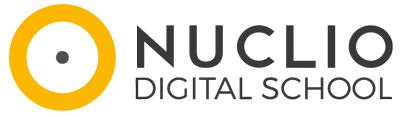


# **Modulo 4. Análisis de datos - Proyecto final**



# **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024


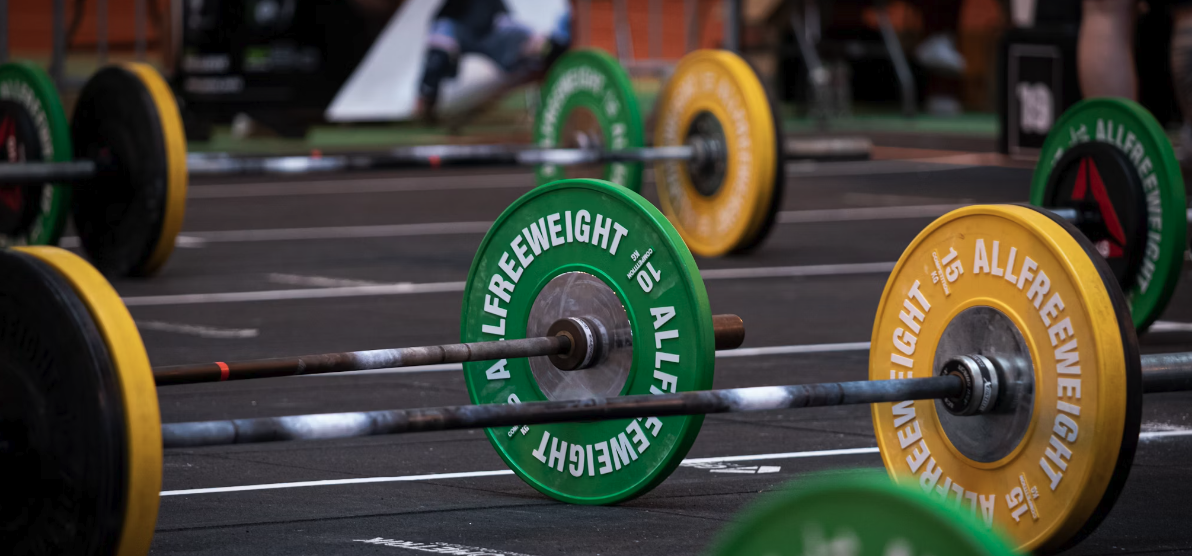

# **Parte 1.** Disponemos de la información

## Paso 1. Importar librerías

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from fuzzywuzzy import process
import warnings
warnings.filterwarnings('ignore')
import os


## Paso 2. Cargar datos

In [568]:
import os
path ='/Users/monica/Desktop/nucleo digital school/explotacion de datos/PROYECTO FINAL/archivos/'

ficheros = [file for file in os.listdir(path)]

dict_datos = {}

for file in ficheros:
    print('Leo los datos de: ' + file)
    if file.endswith('.csv'):
        df = pd.read_csv(path + file)
    else:
        df = pd.read_excel(path + file)

    dict_datos[file] = df
dict_datos.keys()
for k, v in dict_datos.items():
    print(k)
    display(v.head(2))


Leo los datos de: Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv
Leo los datos de: Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv
Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino


Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino


In [569]:
def exploracion_inicial(df, tipo = None):
    if tipo == 'version_lite':
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        display(df.head(2))
        
    else:
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        display(df.head())
        display(df.tail())
        display(df.sample(n = 5))
        for i in list(df.columns):
            print('\t - ' + i)
        print(df.dtypes)
        print(df.dtypes.value_counts())
        print(df.info())
        print(df.nunique())
        display(df.describe(include = 'all').fillna(''))
        print(df.isnull().sum().sort_values(ascending = False))
        print(round((df.isnull().sum()/len(df)*100), 2).sort_values(ascending = False))

        

## Paso 3. Exploración inicial

In [570]:
df_2019=dict_datos["Campeonato_Europeo_de_Halterofilia_de_2019_datos_original.csv"]


In [571]:
exploracion_inicial(df_2019)


	Hay 20 filas y 6 columnas.


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino


,Eventos,Oro,Plata,Bronce,Año,Genero
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
12,55 kg (07.04),Joanna Łochowska Polonia 87 + 112 = 199,Svetlana Yershova Rusia 90 + 108 = 198,Kristina Novitskaya Rusia 85 + 105 = 190,2019,Femenino
10,45 kg (06.04),Şaziye Erdoğan Turquía 75 + 88 = 163[n 1]​,Ivana Petrova Bulgaria 69 + 89 = 158[n 1]​,Yuliya Asayonak Bielorrusia 69 + 81 = 150[n 1]​,2019,Femenino
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino


	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object
object    5
int64     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None
Eventos    20
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64


,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,20,20,20,20,,2
top,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,,Masculino
freq,1,1,1,1,,10
mean,,,,,2019.0,
std,,,,,0.0,
min,,,,,2019.0,
25%,,,,,2019.0,
50%,,,,,2019.0,
75%,,,,,2019.0,


Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64


In [572]:
df_2019.nunique()


Eventos    20
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64

In [573]:
df_2019.duplicated().sum()


np.int64(0)

In [574]:
df_2020=dict_datos["Campeonato_Europeo_de_Halterofilia_de_2020_datos_original.csv"]


In [575]:
exploracion_inicial(df_2020)


	Hay 20 filas y 6 columnas.


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino


,Eventos,Oro,Plata,Bronce,Año,Genero
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2020,Masculino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino


	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Año
	 - Genero
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object
object    5
int64     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Año      20 non-null     int64 
 5   Genero   20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB
None
Eventos    19
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64


,Eventos,Oro,Plata,Bronce,Año,Genero
count,20,20,20,20,20.0,20
unique,19,20,20,20,,2
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,,Masculino
freq,2,1,1,1,,10
mean,,,,,2020.0,
std,,,,,0.0,
min,,,,,2020.0,
25%,,,,,2020.0,
50%,,,,,2020.0,
75%,,,,,2020.0,


Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Año        0.0
Genero     0.0
dtype: float64


In [576]:
df_2020.duplicated().sum()


np.int64(0)

In [577]:
df_2020.nunique()


Eventos    19
Oro        20
Plata      20
Bronce     20
Año         1
Genero      2
dtype: int64

In [578]:
df_2019.columns


Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero'], dtype='object')

## Paso 4. Crear un único dataframe con los datos de 2019 y 2020

In [579]:
df_2019_2021 = pd.concat([df_2019, df_2020], axis = 0).reset_index(drop=True)
df_2019_2021


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


**#** El anterior analista se equivocó. En 2020 no hubo campionato debido al COVID. Reemplazaremos el 2020 por el 2021

In [580]:
df_2019_2021['Año'] = df_2019_2021['Año'].replace(2020, 2021)
df_2019_2021


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


** Comprobamos que el concat se ha hecho correctamente

In [581]:
df_2019_2021.index


RangeIndex(start=0, stop=40, step=1)

In [582]:
df_2019_2021.duplicated().sum()


np.int64(0)

In [583]:
df_2019_2021.isnull().sum()


Eventos    0
Oro        0
Plata      0
Bronce     0
Año        0
Genero     0
dtype: int64

In [584]:
df_2019_2021.dtypes


Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

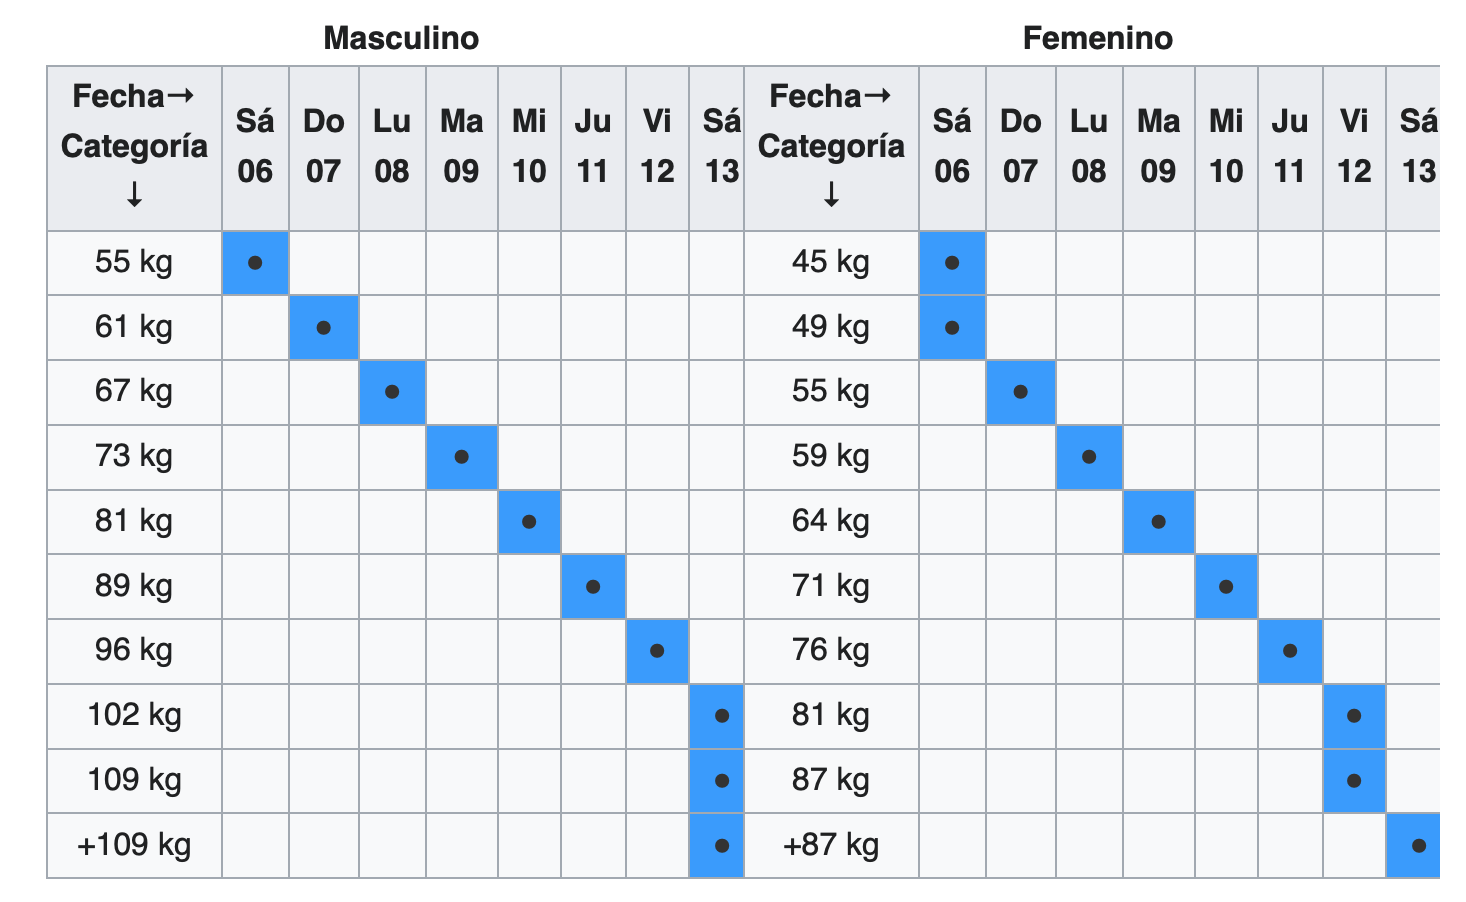

** DEDUCCIONES: Eventos corresponde a Categoría (son los pesos que levantan los atletas) y las fechas entre paréntesis las fechas que se realizó el campeonato. La categoria ya vemos que vamos a tener que tratarlo, ya sea separando las fechas de los pesos.
ORO PLATA Y BRONCE tenemos la información de arrancada, dos tiempos, total, nombre, apellido, país que vamos a tener que separar

** las expresiones [n 2]/[n 1]​ corresponden a leyendas (podrán ser eliminadas del dataframe ya que no es información relevante para el análisis). 
Masculino:

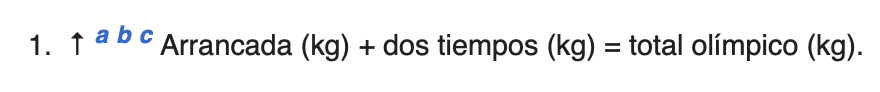

## Paso 5. Transformar los datos

Femenino:

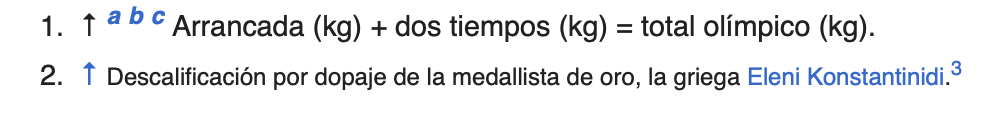

** debemos pues quitar del dataframe a Eleni konstantinidi. Podremos eliminar las expresiones que corresponden a las leyendas

In [585]:
elen_search_oro = df_2019_2021[df_2019_2021['Oro'].str.contains(r'\bEleni\s*Konstantinidi\b', flags=re.IGNORECASE, na=False)]
elen_search_plata = df_2019_2021[df_2019_2021['Plata'].str.contains(r'\bEleni\s*Konstantinidi\b', flags=re.IGNORECASE, na=False)]
elen_search_bronce = df_2019_2021[df_2019_2021['Bronce'].str.contains(r'\bEleni\s*Konstantinidi\b', flags=re.IGNORECASE, na=False)]

print("Eleni en Oro:")
print(elen_search_oro)

print("Eleni en Plata:")
print(elen_search_plata)

print("Eleni en Bronce:")
print(elen_search_bronce)


Eleni en Oro:
Empty DataFrame
Columns: [Eventos, Oro, Plata, Bronce, Año, Genero]
Index: []
Eleni en Plata:
Empty DataFrame
Columns: [Eventos, Oro, Plata, Bronce, Año, Genero]
Index: []
Eleni en Bronce:
Empty DataFrame
Columns: [Eventos, Oro, Plata, Bronce, Año, Genero]
Index: []


** en principio ya ha sido eliminada al extaer los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [586]:
df_2019_2021.columns
df_2019_2021


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [587]:
# vamos a empezar a transformar los datos. Hacemos una copia para conservar el dataframe original sin cambios
df_fase1=df_2019_2021.copy()



In [588]:
df_fase1


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino
5,89 kg (11.04),Hakob Mkrtchian Armenia 164 + 207 = 371,Revaz Davitadze Georgia 170 + 200 = 370,Davit Hovhannisian Armenia 165 + 195 = 360,2019,Masculino
6,96 kg (12.04),Yauheni Tsijantsou Bielorrusia 178 + 222 = 400,Yegor Klimonov Rusia 168 + 210 = 378,Anton Pliesnoi Georgia 173 + 204 = 377,2019,Masculino
7,102 kg (13.04),Dmytro Chumak Ucrania 175 + 216 = 391,Samvel Gasparian Armenia 168 + 209 = 377,Vadzim Straltsou Bielorrusia 170 + 206 = 376,2019,Masculino
8,109 kg (13.04),Simon Martirosian Armenia 192 + 235 = 427,Andrei Aramnau Bielorrusia 190 + 221 = 411,Rodion Bochkov Rusia 192 + 218 = 410,2019,Masculino
9,+109 kg (13.04),Lasha Talajadze Georgia 218 + 260 = 478,Irakli Turmanidze Georgia 206 + 241 = 447,Ruben Alexanian Armenia 195 + 245 = 440,2019,Masculino


In [589]:
#vamos a derretir las columnas oro, plata, bronce para conseguir una sola columna de medallas con el melt
df_fase1_melted = pd.melt(df_fase1, 
                          id_vars=['Eventos', 'Año', 'Genero'], 
                          value_vars=['Oro', 'Plata', 'Bronce'], 
                          var_name='Medalla', 
                          value_name='Atleta')
df_fase1_melted


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
115,71 kg (07.04),2021,Femenino,Bronce,Raluca Olaru Rumania 98 + 120 = 218
116,76 kg (08.04),2021,Femenino,Bronce,Anastasiya Romanova Rusia 111 + 132 = 243
117,81 kg (09.04),2021,Femenino,Bronce,Liana Guiurdzhian Armenia 98 + 129 = 227
118,87 kg (10.04),2021,Femenino,Bronce,Daria Riazanova Rusia 105 + 135 = 240


In [590]:
df_fase1_melted.dtypes


Eventos    object
Año         int64
Genero     object
Medalla    object
Atleta     object
dtype: object

In [591]:
df_fase1_melted = df_fase1_melted.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_fase1_melted


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356
...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

In [592]:
df_fase1_melted.index


RangeIndex(start=0, stop=120, step=1)

In [593]:
df_fase1_melted.rename(columns={'Año': 'Fecha'}, inplace=True)



In [594]:
def tiene_cuatro_palabras(athlete_str):
    partes = athlete_str.split()
    for i, palabra in enumerate(partes):
        if palabra.isdigit():  
            return len(partes[:i]) == 4
    
    return False 
mask = df_fase1_melted[df_fase1_melted['Atleta'].apply(tiene_cuatro_palabras)]
mask


,Eventos,Fecha,Genero,Medalla,Atleta
35,71 kg (07.04),2021,femenino,oro,emily godley reino unido 98 + 129 = 227
39,+87 kg (11.04),2021,femenino,oro,emily campbell reino unido 122 + 154 = 276
55,71 kg (10.04),2019,femenino,plata,emily godley reino unido 93 + 123 = 216
57,81 kg[n 2]​ (12.04),2019,femenino,plata,anna van bellinghen bélgica 103 + 118 = 221
74,64 kg (06.04),2021,femenino,plata,sarah davies reino unido 101 + 129 = 230
94,64 kg (09.04),2019,femenino,bronce,zoe smith reino unido 96 + 128 = 224
99,+87 kg (13.04),2019,femenino,bronce,emily campbell reino unido 115 + 145 = 260


In [595]:
# vemos que Anna van Bellinghen tiene 2 apellidos y que Reino Unido es un país de nombre compuesto. 


In [596]:
import re

def separar_nombre(info_atleta):
    info_atleta = re.sub(r'[\d\+\=\[\]\(\)\/\-\.\,]', '', info_atleta)  
    info_atleta = re.sub(r'\s{2,}', ' ', info_atleta)  
    paises = ['afganistán', 'albania', 'alemania', 'andorra', 'angola', 'antigua', 'arabia', 
    'argentina', 'armenia', 'australia', 'austria', 'azerbaiyán', 'bahamas', 
    'bahréin', 'bangladesh', 'barbados', 'bélgica', 'belice', 'benín', 'bielorrusia',
    'birmania', 'bolivia', 'bosnia', 'botsuana', 'brasil', 'brunei', 'bulgaria',
    'burkina faso', 'burundi', 'bután', 'cabo verde', 'camerún', 'canadá', 'catar',
    'chad', 'chile', 'china', 'chipre', 'colombia', 'comoras', 'congo', 'corea', 
    'costa rica', 'croacia', 'cuba', 'curazao', 'cyprus', 'dinamarca', 'dominica', 
    'egipto', 'el salvador', 'emiratos árabes unidos', 'ecuador', 'eritrea', 'escocia', 
    'eslovaquia', 'eslovenia', 'españa', 'estonia', 'eswatini', 'etiopía', 'fiji', 
    'filipinas', 'finlandia', 'francia', 'gabón', 'gambia', 'gana', 'georgia', 
    'granada', 'grecia', 'guatemala', 'guinea', 'guinea-bisáu', 'guyana', 'haití', 
    'honduras', 'hungría', 'india', 'indonesia', 'irak', 'irán', 'irlanda', 'islandia', 
    'israel', 'italia', 'jamaica', 'japón', 'jordania', 'kazajistán', 'kenia', 
    'kirguistán', 'kiribati', 'kuwait', 'laos', 'lesoto', 'letonia', 'líbano', 
    'liberia', 'libia', 'liechtenstein', 'lituania', 'luxemburgo', 'madagascar', 
    'malasia', 'malawi', 'maldivas', 'mali', 'malta', 'marruecos', 'mauricio', 
    'mauritania', 'méxico', 'micronesia', 'mónaco','moldavia','mongolia', 'mozambique', 
    'namibia', 'nauru', 'nepal', 'nicaragua', 'níger', 'nigeria', 'noruega', 
    'nueva zelanda', 'omán', 'pakistán', 'palaos', 'panamá', 'papúa nueva guinea', 
    'paraguay', 'perú', 'polonia', 'portugal', 'reino unido', 'ruanda', 'rumania', 
    'rusia', 'samoa', 'san cristóbal', 'san marino', 'santo tomé y príncipe', 'senegal', 
    'serbia', 'seychelles', 'singapur', 'siria', 'somalia', 'sri lanka', 'sudán', 
    'suecia', 'suiza', 'surinam', 'tailandia', 'tanzania', 'tayikistán', 'togo', 
    'tonga', 'trinidad y tobago', 'túnez', 'turkmenistán', 'turquía', 'tuvalu', 
    'ucrania', 'uganda', 'uruguay', 'uzbekistán', 'vanuatu', 'vaticano', 'venezuela', 
    'vietnam', 'yemen', 'yibuti', 'zambia', 'zimbabue']

    for pais in paises:
        info_atleta = info_atleta.replace(pais, '')
    info_atleta = info_atleta.replace("\u200b", "")
    info_atleta = info_atleta.strip() 
    partimos_cadena = info_atleta.split()
    if partimos_cadena[-1].lower() == 'n':
        partimos_cadena = partimos_cadena[:-1] 
    nombre_atleta = partimos_cadena[0] 
    apellido_atleta = " ".join(partimos_cadena[1:]) 

    return nombre_atleta, apellido_atleta

df_fase1_melted['Nombre'] = df_fase1_melted['Atleta'].apply(lambda x: separar_nombre(x)[0])
df_fase1_melted['Apellido'] = df_fase1_melted['Atleta'].apply(lambda x: separar_nombre(x)[1])

print(df_fase1_melted[['Nombre', 'Apellido']].head())


      Nombre    Apellido
0      mirco  scarantino
1     henadz     laptseu
2  bernardin       matam
3   bozhidar     andreev
4   antonino   pizzolato


In [597]:
df_fase1_melted.Nombre.unique()


array(['mirco', 'henadz', 'bernardin', 'bozhidar', 'antonino', 'hakob',
       'yauheni', 'dmytro', 'simon', 'lasha', 'şaziye', 'elena', 'joanna',
       'rebeka', 'loredana', 'anastasiya', 'daria', 'nina', 'xeniya',
       'tatiana', 'anguel', 'stilian', 'muhammed', 'daniyar', 'karen',
       'anton', 'samvel', 'nadezhda', 'monica', 'kamila', 'boyanka',
       'emily', 'iryna', 'alina', 'bünyamin', 'briken', 'piotr', 'revaz',
       'yegor', 'andrei', 'li', 'ivana', 'kristina', 'svetlana', 'irina',
       'lidia', 'anna', 'diana', 'valentin', 'shota', 'mirko', 'marin',
       'karlos', 'arsen', 'jristo', 'gor', 'olga', 'sarah', 'alessia',
       'yana', 'gaëlle', 'muammer', 'ferdi', 'goga', 'vadzim', 'ritvars',
       'davit', 'rodion', 'ruben', 'yuliya', 'giorgia', 'alexandra',
       'zoe', 'mădălina', 'patricia', 'liana', 'andranik', 'dadaş',
       'timur', 'varazdat', 'melisa', 'mihaela', 'dora', 'raluca',
       'melike'], dtype=object)

In [598]:
df_fase1_melted['Apellido'].unique()


array(['scarantino', 'laptseu', 'matam', 'andreev', 'pizzolato',
       'mkrtchian', 'tsijantsou', 'chumak', 'martirosian', 'talajadze',
       'erdoğan', 'andrieș', 'łochowska', 'koha', 'toma', 'romanova',
       'naumava', 'schroth', 'pasjina', 'kashirina', 'rusev', 'grozdev',
       'özbek', 'i̇smayilov', 'avaguian', 'pliesnoi', 'gasparian',
       'nguen', 'csengeri', 'konotop', 'kostova', 'godley', 'deja',
       'marushchak', 'ajmerova', 'campbell', 'sezer', 'brandhuber',
       'calja', 'asayonak', 'davitadze', 'klimonov', 'aramnau',
       'turmanidze', 'petrova', 'sobol', 'yershova', 'aleyeva', 'lepșa',
       'valentín', 'van bellinghen', 'mstiyeva', 'lysenko', 'iancu',
       'mishvelidze', 'zanni', 'robu', 'nasar', 'jristov', 'minasian',
       'tio', 'davies', 'durante', 'sotiyeva', 'nayoketchanke', 'cîlcic',
       'şahin', 'hardal', 'chjeidze', 'lijarad', 'suharevs',
       'hovhannisian', 'straltsou', 'bochkov', 'alexanian', 'russo',
       'novitskaya', 'kozlova', 'smi

In [599]:
#el apellido Van Bellinghen se ha extraído correctamente


In [600]:
df_fase1_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato
...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218,raluca,olaru
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243,anastasiya,romanova
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227,liana,guiurdzhian
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240,daria,riazanova


In [601]:
import re
def extraer_resultados(atleta):
    pattern = r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)'
    match = re.search(pattern, atleta)
    
    if match:
        arrancada = int(match.group(1))
        dos_tiempos = int(match.group(2))
        total = int(match.group(3))
        return pd.Series([arrancada, dos_tiempos, total])
    else:
        return pd.Series([None, None, None])
df_fase1_melted[['Arrancada', 'Dos Tiempos', 'Total']] = df_fase1_melted['Atleta'].apply(extraer_resultados)

df_fase1_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218,raluca,olaru,98,120,218
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243,anastasiya,romanova,111,132,243
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227,liana,guiurdzhian,98,129,227
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240,daria,riazanova,105,135,240


In [602]:
df_fase1_melted.index


RangeIndex(start=0, stop=120, step=1)

In [603]:
df_fase1_melted.Arrancada


0      116
1      133
2      137
3      153
4      155
      ... 
115     98
116    111
117     98
118    105
119    108
Name: Arrancada, Length: 120, dtype: int64

In [604]:
df_fase1_melted["Dos Tiempos"].unique()


array([145, 153, 175, 192, 201, 207, 222, 216, 235, 260,  88, 103, 112,
       120, 128, 136, 132, 185, 147, 160, 178, 181, 206, 200, 213, 214,
       226, 263,  83, 113, 116, 130, 129, 135, 127, 138, 154, 146, 151,
       165, 183, 196, 210, 209, 221, 241,  89,  95, 108, 123, 133, 118,
       148, 140, 155, 170, 203, 202, 220, 248,  85,  96, 115, 122, 134,
       131, 169, 182, 195, 204, 218, 245,  81, 105, 117, 114, 137, 157,
       177, 184, 190, 212, 217, 240, 100, 109])

In [605]:
df_fase1_melted["Total"].unique()


array([261, 286, 312, 345, 356, 371, 400, 391, 427, 478, 163, 190, 199,
       221, 239, 240, 242, 222, 331, 258, 296, 323, 341, 370, 375, 393,
       390, 407, 485, 155, 189, 208, 211, 244, 227, 248, 236, 246, 276,
       256, 283, 311, 339, 355, 378, 377, 411, 447, 158, 180, 198, 214,
       229, 216, 241, 268, 290, 318, 369, 374, 380, 406, 464, 152, 181,
       200, 210, 230, 219, 231, 245, 252, 247, 282, 308, 335, 354, 360,
       376, 410, 440, 150, 178, 213, 224, 215, 233, 217, 260, 287, 315,
       336, 347, 365, 372, 379, 401, 445, 151, 197, 218, 243])

In [606]:
df_fase1_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218,raluca,olaru,98,120,218
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243,anastasiya,romanova,111,132,243
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227,liana,guiurdzhian,98,129,227
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240,daria,riazanova,105,135,240


In [607]:
# Diccionario de países compuestos. Debo asegurarme que el codigo servirá para los siguientes dataframes
paises_compuestos = {
    'reino unido': ['unido'],
    'estados unidos': ['estados unidos'],
    'nueva zelanda': ['nueva zelanda'],
    'sudáfrica': ['sudáfrica'],
    'trinidad y tobago': ['trinidad y tobago'],
    'antigua y barbuda': ['antigua y barbuda'],
    'papúa nueva guinea': ['papúa nueva guinea'],
    'costa rica': ['costa rica'],
    'bosnia y herzegovina': ['bosnia y herzegovina'],
    'islas malvinas': ['islas malvinas'],
    'república checa': ['república checa'],
    'república dominicana': ['república dominicana'],
    'guinea ecuatorial': ['guinea ecuatorial'],
    'san cristóbal y nieves': ['san cristóbal y nieves'],
    'santo tomé y príncipe': ['santo tomé y príncipe'],
    'islas salomón': ['islas salomón'],
    'el salvador': ['el salvador'],
    'puerto rico': ['puerto rico'],
    'malasia': ['malasia'],
    'arabia saudita': ['arabia saudita'],
    'singapur': ['singapur'],
    'belice': ['belice'],
    'san vicente y las granadinas': ['san vicente y las granadinas'],
    'islas caimán': ['islas caimán'],
    'islas marshall': ['islas marshall'],
    'islas fiji': ['islas fiji'],
    'islas comoras': ['islas comoras'],
    'islas seychelles': ['islas seychelles'],
    'islas vírgenes británicas': ['islas vírgenes británicas'],
    'república del congo': ['república del congo'],
    'república democrática del congo': ['república democrática del congo'],
    'república de guinea': ['república de guinea'],
    'república de sudáfrica': ['república de sudáfrica'],
    'república árabe siria': ['república árabe siria'],
    'islas maldivas': ['islas maldivas'],
    'república de cabo verde': ['república de cabo verde'],
    'papúa nueva guinea': ['papúa nueva guinea'],
    'bosnia y herzegovina': ['bosnia y herzegovina'],
    'saint kitts y nevis': ['saint kitts y nevis'],
    'saint lucia': ['saint lucia'],
    'saint vincent and the grenadines': ['saint vincent and the grenadines'],
    'timor oriental': ['timor oriental'],
    'costa de marfil': ['costa de marfil'],
    'república de guinea ecuatorial': ['república de guinea ecuatorial'],
    'república de malta': ['república de malta']
}

def extraer_pais(atleta):
    partes = atleta.split()

    partes = [parte for parte in partes if parte.isalpha()]
 
    for pais, componentes in paises_compuestos.items():
        if len(componentes) == 1 and partes[-1] == componentes[0]:
            return pais
        elif len(componentes) > 1 and partes[-len(componentes):] == componentes:
            return pais

    return partes[-1]

df_fase1_melted['País'] = df_fase1_melted['Atleta'].apply(extraer_pais)


In [608]:
df_fase1_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total,País
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261,italia
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286,bielorrusia
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312,francia
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345,bulgaria
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356,italia
...,...,...,...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218,raluca,olaru,98,120,218,rumania
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243,anastasiya,romanova,111,132,243,rusia
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227,liana,guiurdzhian,98,129,227,armenia
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240,daria,riazanova,105,135,240,rusia


In [609]:
df_fase1_melted.País.unique()


array(['italia', 'bielorrusia', 'francia', 'bulgaria', 'armenia',
       'ucrania', 'georgia', 'turquía', 'rumania', 'polonia', 'letonia',
       'rusia', 'alemania', 'azerbaiyán', 'reino unido', 'albania',
       'españa', 'bélgica', 'moldavia', 'suecia', 'austria'], dtype=object)

In [610]:
paso_6 = df_fase1_melted[['Fecha', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']].copy()
paso_6


,Fecha,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,2019,mirco,scarantino,italia,116,145,261
1,2019,henadz,laptseu,bielorrusia,133,153,286
2,2019,bernardin,matam,francia,137,175,312
3,2019,bozhidar,andreev,bulgaria,153,192,345
4,2019,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...
115,2021,raluca,olaru,rumania,98,120,218
116,2021,anastasiya,romanova,rusia,111,132,243
117,2021,liana,guiurdzhian,armenia,98,129,227
118,2021,daria,riazanova,rusia,105,135,240


## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [611]:
df_fase1_melted['Categoría'] = df_fase1_melted['Eventos'].str.extract(r'(\+?\d+\s?kg)')


In [612]:
df_fase1_melted.Categoría.unique()


array(['55\xa0kg', '61\xa0kg', '67\xa0kg', '73\xa0kg', '81\xa0kg',
       '89\xa0kg', '96\xa0kg', '102\xa0kg', '109\xa0kg', '+109\xa0kg',
       '45\xa0kg', '49\xa0kg', '59\xa0kg', '64\xa0kg', '71\xa0kg',
       '76\xa0kg', '87\xa0kg', '+87\xa0kg'], dtype=object)

In [613]:
df_fase1_melted['Categoría'] = df_fase1_melted['Categoría'].str.replace('\u00a0', ' ', regex=False)


In [614]:
df_fase1_melted.Categoría.unique()


array(['55 kg', '61 kg', '67 kg', '73 kg', '81 kg', '89 kg', '96 kg',
       '102 kg', '109 kg', '+109 kg', '45 kg', '49 kg', '59 kg', '64 kg',
       '71 kg', '76 kg', '87 kg', '+87 kg'], dtype=object)

In [615]:
df_fase1_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total,País,Categoría
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261,italia,55 kg
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286,bielorrusia,61 kg
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312,francia,67 kg
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345,bulgaria,73 kg
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356,italia,81 kg
...,...,...,...,...,...,...,...,...,...,...,...,...
115,71 kg (07.04),2021,femenino,bronce,raluca olaru rumania 98 + 120 = 218,raluca,olaru,98,120,218,rumania,71 kg
116,76 kg (08.04),2021,femenino,bronce,anastasiya romanova rusia 111 + 132 = 243,anastasiya,romanova,111,132,243,rusia,76 kg
117,81 kg (09.04),2021,femenino,bronce,liana guiurdzhian armenia 98 + 129 = 227,liana,guiurdzhian,98,129,227,armenia,81 kg
118,87 kg (10.04),2021,femenino,bronce,daria riazanova rusia 105 + 135 = 240,daria,riazanova,105,135,240,rusia,87 kg


In [616]:
#creamos el nuevo dataframe con las columnas que nos interesan
df_paso7 = df_fase1_melted[['Genero', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]
df_paso7


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [617]:
df_paso8=df_paso7
df_paso8.dtypes


Genero         object
Categoría      object
Fecha           int64
Medalla        object
Nombre         object
Apellido       object
País           object
Arrancada       int64
Dos Tiempos     int64
Total           int64
dtype: object

In [618]:
df_paso8['Categoría'] = df_paso8['Categoría'].astype('category')
df_paso8['Medalla'] = df_paso8['Medalla'].astype('category')
df_paso8['Fecha'] = pd.to_datetime(df_paso8['Fecha'], format='%Y')
df_paso8['Fecha'] = df_paso8['Fecha'].dt.year
df_paso8


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [619]:
df1921=df_paso8
df1921['Medalla'] = df1921['Medalla'].astype(str)
df1921['Medalla'] = df1921['Medalla'].astype('category')
df1921




,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


In [620]:
df1921.sort_values(by = ['Genero', 'Categoría', 'Fecha', 'Medalla'], ascending = True, ignore_index = True)
df1921



,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


In [621]:
df1921.Medalla.unique()


['oro', 'plata', 'bronce']
Categories (3, object): ['bronce', 'oro', 'plata']

In [622]:
df1921.Categoría.unique()


['55 kg', '61 kg', '67 kg', '73 kg', '81 kg', ..., '64 kg', '71 kg', '76 kg', '87 kg', '+87 kg']
Length: 18
Categories (18, object): ['+109 kg', '+87 kg', '102 kg', '109 kg', ..., '81 kg', '87 kg', '89 kg', '96 kg']

## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

In [623]:
import matplotlib.pyplot as plt
import seaborn as sns


In [624]:
df1921.describe().round(1)


,Fecha,Arrancada,Dos Tiempos,Total
count,120.0,120.0,120.0,120.0
mean,2020.0,129.6,157.4,287.0
std,1.0,38.6,45.2,83.6
min,2019.0,67.0,81.0,150.0
25%,2019.0,99.5,122.0,221.8
50%,2020.0,114.5,145.0,257.0
75%,2021.0,163.2,200.0,366.0
max,2021.0,222.0,263.0,485.0


In [625]:
df1921.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Genero       120 non-null    object  
 1   Categoría    120 non-null    category
 2   Fecha        120 non-null    int32   
 3   Medalla      120 non-null    category
 4   Nombre       120 non-null    object  
 5   Apellido     120 non-null    object  
 6   País         120 non-null    object  
 7   Arrancada    120 non-null    int64   
 8   Dos Tiempos  120 non-null    int64   
 9   Total        120 non-null    int64   
dtypes: category(2), int32(1), int64(3), object(4)
memory usage: 8.2+ KB


In [626]:
df1921.describe(include="category")


,Categoría,Medalla
count,120,120
unique,18,3
top,81 kg,bronce
freq,12,40


In [627]:
df1921.isnull().sum()


Genero         0
Categoría      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
País           0
Arrancada      0
Dos Tiempos    0
Total          0
dtype: int64

In [628]:
df1921.Total.isnull().sum()


np.int64(0)

In [629]:
filas_nulas = df1921[df1921['Total'].isnull()]
filas_nulas


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total


In [630]:
df1921.País.value_counts()


País
rusia          20
armenia        14
bulgaria       10
georgia         9
bielorrusia     9
rumania         9
turquía         9
ucrania         8
italia          6
reino unido     6
francia         3
letonia         3
alemania        2
moldavia        2
azerbaiyán      2
albania         2
bélgica         2
polonia         1
españa          1
suecia          1
austria         1
Name: count, dtype: int64

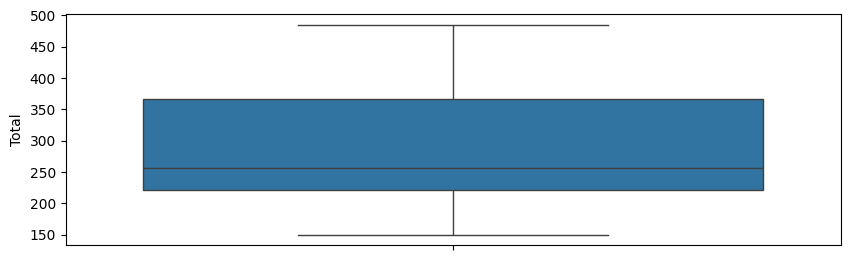

In [631]:
#miraré outliers. No hay puntuaciones fuera de rango. Imagino que debe haber un tope, como una escala.
plt.figure(figsize = (10, 3))
sns.boxplot(data=df1921, y = 'Total')
plt.show()


In [632]:
#lo vamos a asegurar
Q1 = df1921['Total'].quantile(0.25)
print('Valor del segundo cuartil (25%): {:.2f}'.format(Q1))

Q3 = df1921['Total'].quantile(0.75)
print('Valor del tercer cuartil (75%): {:.2f}'.format(Q3))

IQR = Q3 - Q1

print('Valor del rango intercuartil (IQR): {:.2f}'.format(IQR))


Valor del segundo cuartil (25%): 221.75
Valor del tercer cuartil (75%): 366.00
Valor del rango intercuartil (IQR): 144.25


In [633]:
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR
print(f"\t - Límite inferior (considerado extremadamente bajo): {limite_inferior:.2f}")
print(f"\t - Límite superior (considerado extremadamente alto): {limite_superior:.2f}")


	 - Límite inferior (considerado extremadamente bajo): 5.38
	 - Límite superior (considerado extremadamente alto): 582.38


In [634]:
filtro = (df1921['Total']<limite_inferior) | (df1921['Total']>limite_superior)
df1921[filtro]


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total


In [635]:
outliers = list(df1921[(df1921['Total']<limite_inferior) | (df1921['Total']>limite_superior)].index)
len(outliers)


0

## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [636]:
medallas_por_pais = df1921.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

# Agregar una columna con el total de medallas por país
medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)

# Mostrar el resultado
print(medallas_por_pais)


Medalla      bronce  oro  plata  Total
País                                  
albania           1    0      1      2
alemania          0    1      1      2
armenia           7    4      3     14
austria           1    0      0      1
azerbaiyán        1    1      0      2
bielorrusia       3    3      3      9
bulgaria          1    4      5     10
bélgica           1    0      1      2
españa            0    0      1      1
francia           1    1      1      3
georgia           2    3      4      9
italia            1    3      2      6
letonia           2    1      0      3
moldavia          0    0      2      2
polonia           0    1      0      1
reino unido       2    2      2      6
rumania           3    4      2      9
rusia             7    4      9     20
suecia            1    0      0      1
turquía           5    3      1      9
ucrania           1    5      2      8


In [637]:
medallas_por_pais = df1921.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)

print(medallas_por_pais.loc['austria'])


Medalla
bronce    1
oro       0
plata     0
Total     1
Name: austria, dtype: int64


In [638]:
import plotly.express as px

def graficar_proporciones(df1921, variable_categorica_1, variable_categorica_2):
    medallas_por_pais = df1921.groupby(['País', 'Medalla']).size().unstack(fill_value=0)

    colores_personalizados = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#f5a623', '#f0e68c', 
        '#00bfae', '#ff6347', '#3b3a36', '#9c27b0', '#cd5c5c', '#ff1493',  
        '#32cd32', '#ff4500'  
    ]
    
    medallas_por_pais['Total'] = medallas_por_pais.sum(axis=1)

    fig = px.histogram(medallas_por_pais, 
                       x=medallas_por_pais.index, 
                       y=medallas_por_pais.columns[:-1],  
                       title='Medallas conseguidas por país entre 2019-2021',
                       labels={variable_categorica_1: 'Medalla',
                               variable_categorica_2: f'Pais: {variable_categorica_2}'},
                       text_auto=True,
                       barmode='stack',
                       color_discrete_sequence=colores_personalizados)

    fig.update_layout(yaxis_title='Cantidad de Medallas',
                      legend_title=variable_categorica_2,
                      bargap=0.2)

    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    fig.show()

variable_categorica_1 = "Medalla"
variable_categorica_2 = "País"

graficar_proporciones(df1921, variable_categorica_1, variable_categorica_2)


In [639]:
#la paleta la he cambiado muchas veces porque había confusión entre países por la similitud del color


* Medallas oro, plata y bronce por país

In [640]:
medallas_por_pais = df1921.groupby(['País', 'Medalla']).size().reset_index(name='Cantidad')
medallas_por_pais


,País,Medalla,Cantidad
0,albania,bronce,1
1,albania,oro,0
2,albania,plata,1
3,alemania,bronce,0
4,alemania,oro,1
...,...,...,...
58,turquía,oro,3
59,turquía,plata,1
60,ucrania,bronce,1
61,ucrania,oro,5


In [641]:
medallas_por_pais = df1921.groupby('País')['Medalla'].count()


In [642]:
medallas_por_pais = pd.crosstab(df1921['País'], df1921['Medalla'])
medallas_por_pais


Medalla,bronce,oro,plata
País,,,
albania,1,0,1
alemania,0,1,1
armenia,7,4,3
austria,1,0,0
azerbaiyán,1,1,0
bielorrusia,3,3,3
bulgaria,1,4,5
bélgica,1,0,1
españa,0,0,1


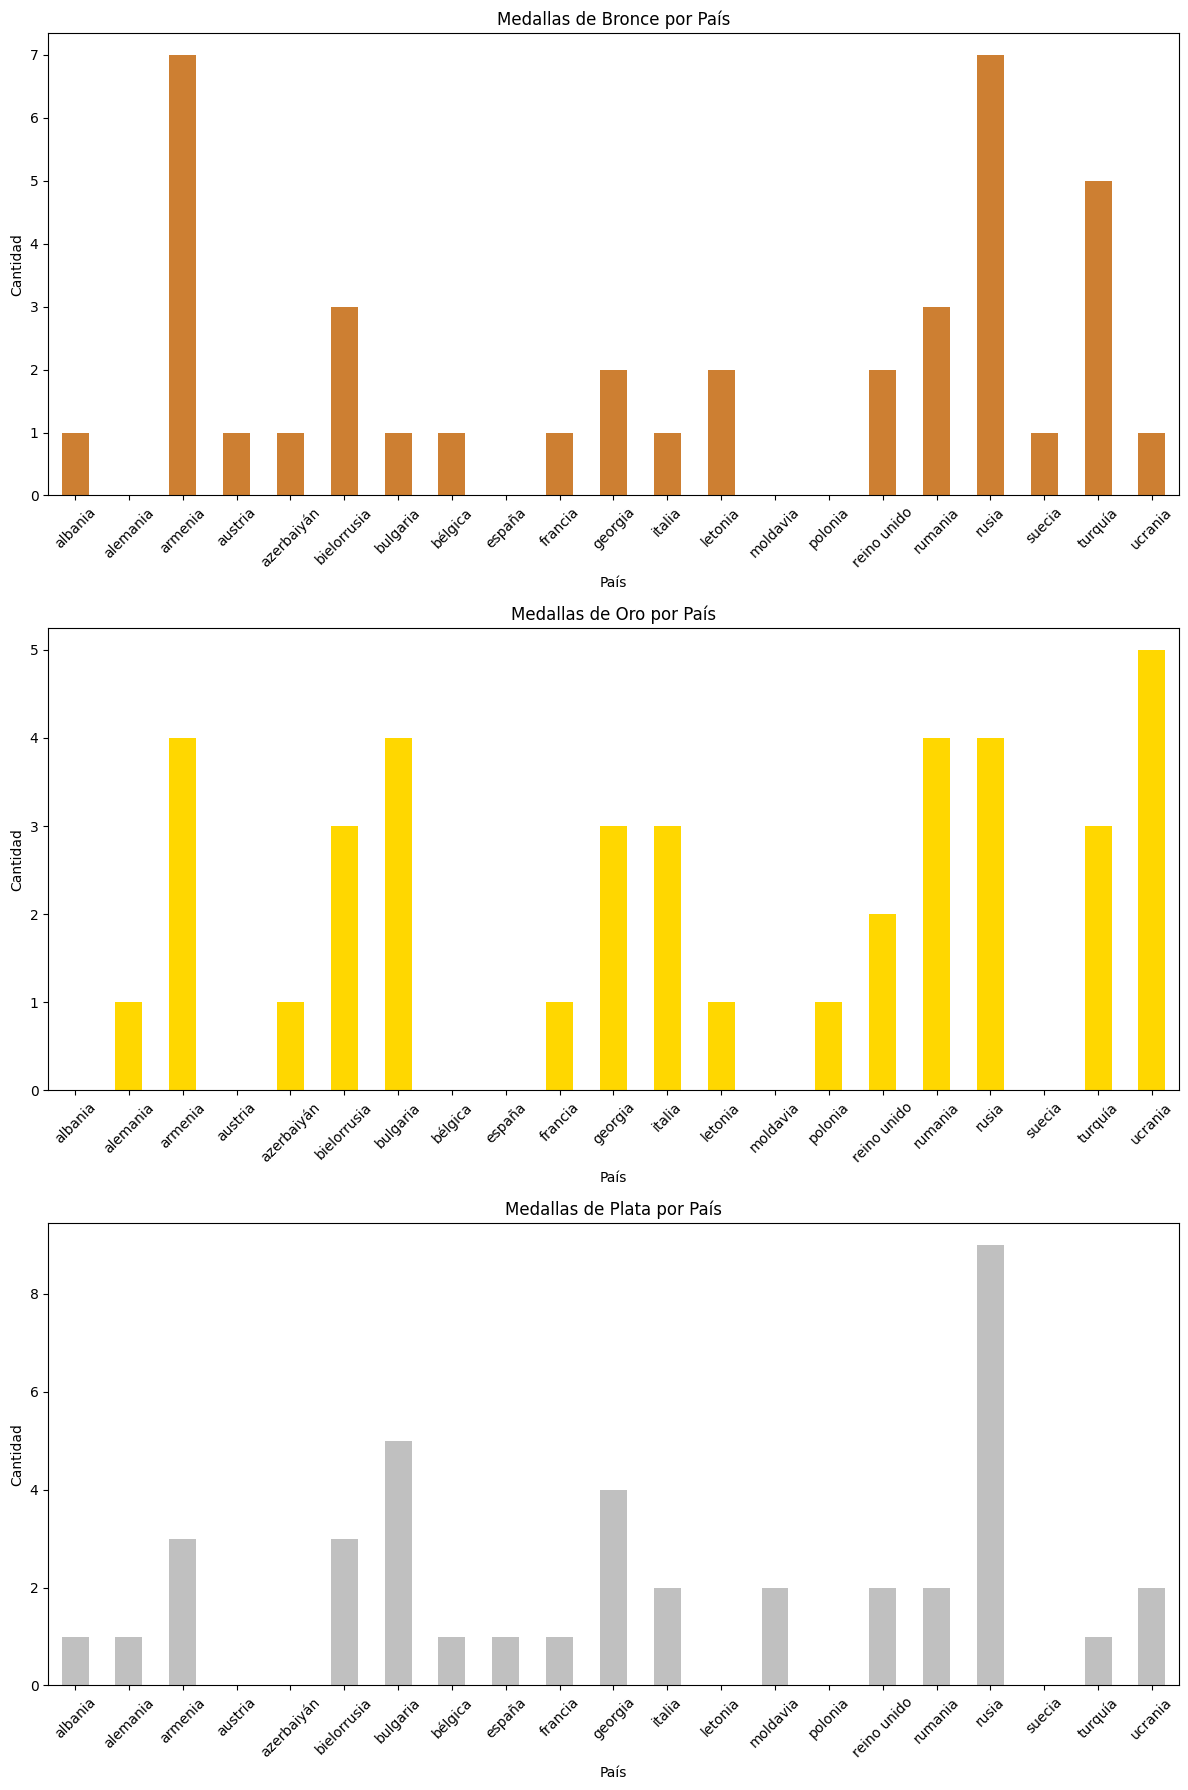

In [643]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))  

colors = ['#cd7f32', '#ffd700', '#c0c0c0']

medallas_por_pais['bronce'].plot(kind='bar', ax=ax[0], color=colors[0])
ax[0].set_title('Medallas de Bronce por País')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Cantidad')
ax[0].set_xticklabels(medallas_por_pais.index, rotation=45)

medallas_por_pais['oro'].plot(kind='bar', ax=ax[1], color=colors[1])
ax[1].set_title('Medallas de Oro por País')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Cantidad')
ax[1].set_xticklabels(medallas_por_pais.index, rotation=45)

medallas_por_pais['plata'].plot(kind='bar', ax=ax[2], color=colors[2])
ax[2].set_title('Medallas de Plata por País')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Cantidad')
ax[2].set_xticklabels(medallas_por_pais.index, rotation=45)

plt.tight_layout()

plt.show()




### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [644]:
df1921


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


In [645]:
equidad_df = df1921.groupby(['País', 'Genero']).size().reset_index(name='Total_Medallas')
equidad_df


,País,Genero,Total_Medallas
0,albania,masculino,2
1,alemania,femenino,1
2,alemania,masculino,1
3,armenia,femenino,2
4,armenia,masculino,12
5,austria,femenino,1
6,azerbaiyán,femenino,1
7,azerbaiyán,masculino,1
8,bielorrusia,femenino,2
9,bielorrusia,masculino,7


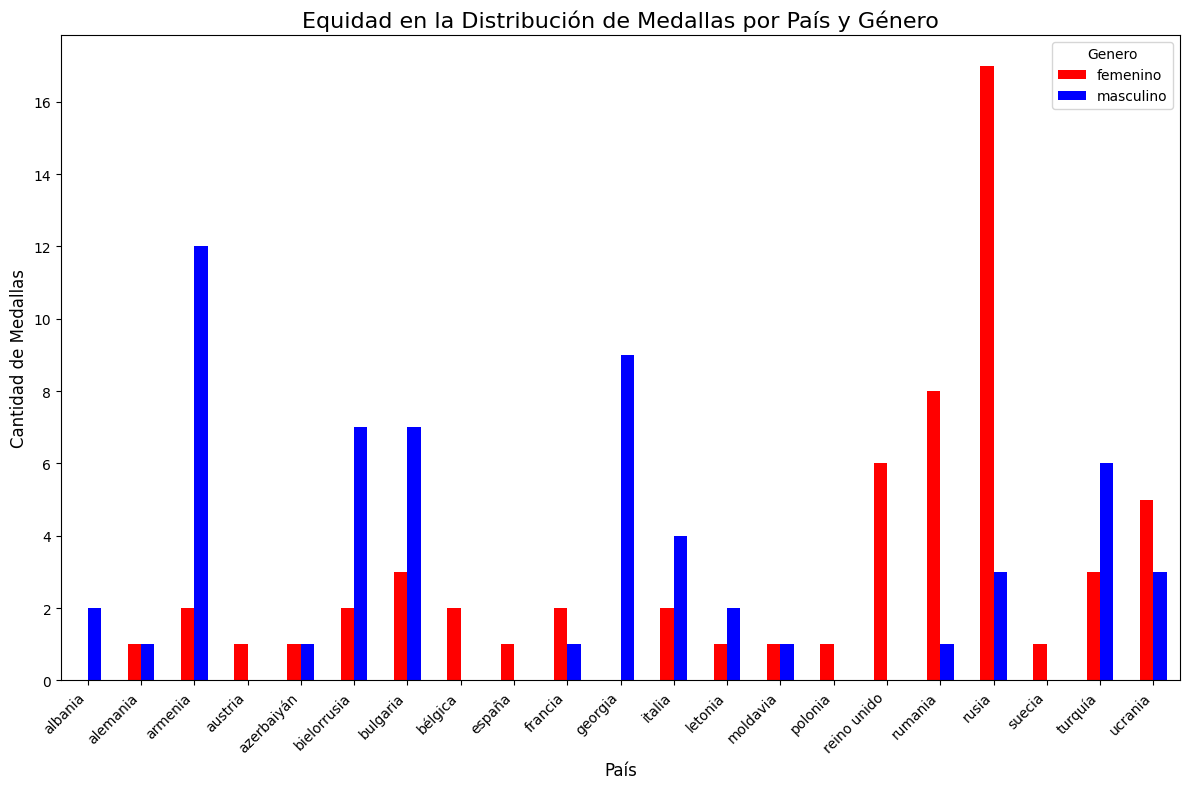

In [646]:
equidad_df = df1921.groupby(['País', 'Genero']).size().reset_index(name='Total_Medallas')
equidad_df.pivot(index='País', columns='Genero', values='Total_Medallas').plot(kind='bar', figsize=(12, 8), color=['red', 'blue'])

plt.title('Equidad en la Distribución de Medallas por País y Género', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de Medallas', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [647]:
promedio_puntos_totales = df1921.groupby(["País","Genero"])['Total'].mean().round(1)
promedio_puntos_totales.reset_index()


,País,Genero,Total
0,albania,masculino,337.5
1,alemania,femenino,222.0
2,alemania,masculino,311.0
3,armenia,femenino,222.0
4,armenia,masculino,397.2
5,austria,femenino,231.0
6,azerbaiyán,femenino,211.0
7,azerbaiyán,masculino,379.0
8,bielorrusia,femenino,196.0
9,bielorrusia,masculino,362.4


In [648]:
promedio_puntos_totales = promedio_puntos_totales.reset_index()


** vamos a graficar visualmente los puntos totales conseguidos por género y país

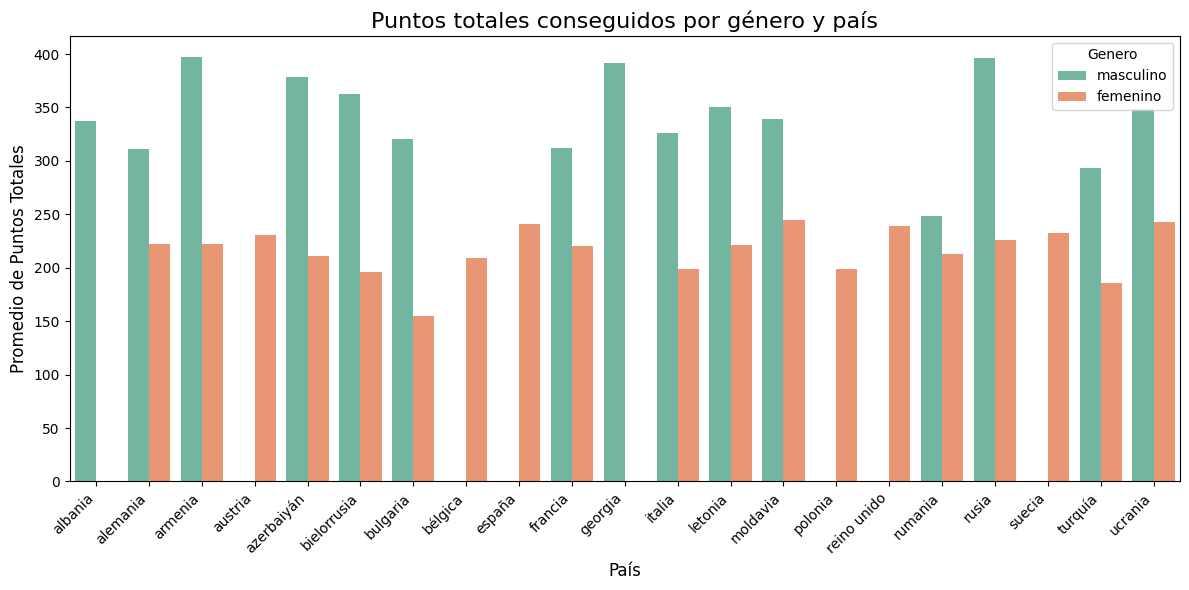

In [649]:
plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_puntos_totales, x='País', y='Total', hue='Genero', palette='Set2')
plt.title('Puntos totales conseguidos por género y país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio de Puntos Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [650]:
#vamos a sacar el porcentaje del masculino respecto al femenino. Sacaremos de la equación aquellos países que no tengan los 2 géneros


In [651]:
grouped = promedio_puntos_totales.groupby(['País', 'Genero'], as_index=False)['Total'].sum()
grouped_by_pais = grouped.groupby('País')['Genero'].apply(set)
grouped_by_pais
paises_con_ambos_generos = grouped_by_pais[grouped_by_pais.apply(lambda x: len(x) == 2)].index
paises_con_ambos_generos
df_filtrado = grouped[grouped['País'].isin(paises_con_ambos_generos)]
total_por_pais = df_filtrado.groupby('País')['Total'].sum().reset_index(name='Total_País')
total_por_pais
df_final_2 = pd.merge(df_filtrado, total_por_pais, on='País')
df_final_2
df_final_2['Porcentaje'] = (df_final_2['Total'] / df_final_2['Total_País']) * 100
df_final_2.round(2)


,País,Genero,Total,Total_País,Porcentaje
0,alemania,femenino,222.0,533.0,41.65
1,alemania,masculino,311.0,533.0,58.35
2,armenia,femenino,222.0,619.2,35.85
3,armenia,masculino,397.2,619.2,64.15
4,azerbaiyán,femenino,211.0,590.0,35.76
5,azerbaiyán,masculino,379.0,590.0,64.24
6,bielorrusia,femenino,196.0,558.4,35.10
7,bielorrusia,masculino,362.4,558.4,64.90
8,bulgaria,femenino,155.0,475.7,32.58
9,bulgaria,masculino,320.7,475.7,67.42


** vamos a verlo graficamente

In [652]:
fig = px.bar(df_final_2.round(2), x='País', y='Porcentaje', color='Genero',
             title='Porcentaje de Masculino y Femenino por País',
             labels={'Pais': 'País', 'Porcentaje': 'Porcentaje (%)', 'Genero': 'Género'},
             text='Porcentaje', barmode='group')
fig.show()


In [653]:
df_masculino = df_final_2[df_final_2['Genero'] == 'Masculino']
df_femenino = df_final_2[df_final_2['Genero'] == 'Femenino']


In [654]:
df_final_2['Genero'] = df_final_2['Genero'].str.strip().str.capitalize()
df_femenino = df_final_2[df_final_2['Genero'] == 'Femenino']
df_masculino = df_final_2[df_final_2['Genero'] == 'Masculino']


In [655]:
df_combinado = pd.merge(df_masculino[['País', 'Porcentaje']], df_femenino[['País', 'Porcentaje']], on='País', suffixes=('_Masculino', '_Femenino'))
df_combinado


,País,Porcentaje_Masculino,Porcentaje_Femenino
0,alemania,58.348968,41.651032
1,armenia,64.147287,35.852713
2,azerbaiyán,64.237288,35.762712
3,bielorrusia,64.899713,35.100287
4,bulgaria,67.416439,32.583561
5,francia,58.591549,41.408451
6,italia,62.168858,37.831142
7,letonia,61.329834,38.670166
8,moldavia,58.047945,41.952055
9,rumania,53.796095,46.203905


In [656]:
df_combinado['Diferencia_Porcentual'] = df_combinado['Porcentaje_Masculino'] - df_combinado['Porcentaje_Femenino']
df_combinado.round(2)


,País,Porcentaje_Masculino,Porcentaje_Femenino,Diferencia_Porcentual
0,alemania,58.35,41.65,16.70
1,armenia,64.15,35.85,28.29
2,azerbaiyán,64.24,35.76,28.47
3,bielorrusia,64.90,35.10,29.80
4,bulgaria,67.42,32.58,34.83
5,francia,58.59,41.41,17.18
6,italia,62.17,37.83,24.34
7,letonia,61.33,38.67,22.66
8,moldavia,58.05,41.95,16.10
9,rumania,53.80,46.20,7.59


In [657]:
fig = px.bar(df_combinado, x='País', y='Diferencia_Porcentual',
             title='Diferencia Porcentual de puntos totales entre Masculino y Femenino por País',
             labels={'Diferencia_Porcentual': 'Diferencia Porcentual (%)', 'País': 'País'},
             color='Diferencia_Porcentual', color_continuous_scale='Viridis')

# Mostrar el gráfico
fig.show()


### Exploración EDA. Seguimos explorando...

** me pregunto como funcionará la distribución de los pesos entre géneros

In [658]:
df1921


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,femenino,71 kg,2021,bronce,raluca,olaru,rumania,98,120,218
116,femenino,76 kg,2021,bronce,anastasiya,romanova,rusia,111,132,243
117,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227
118,femenino,87 kg,2021,bronce,daria,riazanova,rusia,105,135,240


In [659]:
Peso = df1921.groupby(['Categoría', 'Genero']).size().reset_index(name="conteo")
Peso
Peso


,Categoría,Genero,conteo
0,+109 kg,femenino,0
1,+109 kg,masculino,6
2,+87 kg,femenino,6
3,+87 kg,masculino,0
4,102 kg,femenino,0
5,102 kg,masculino,6
6,109 kg,femenino,0
7,109 kg,masculino,6
8,45 kg,femenino,6
9,45 kg,masculino,0


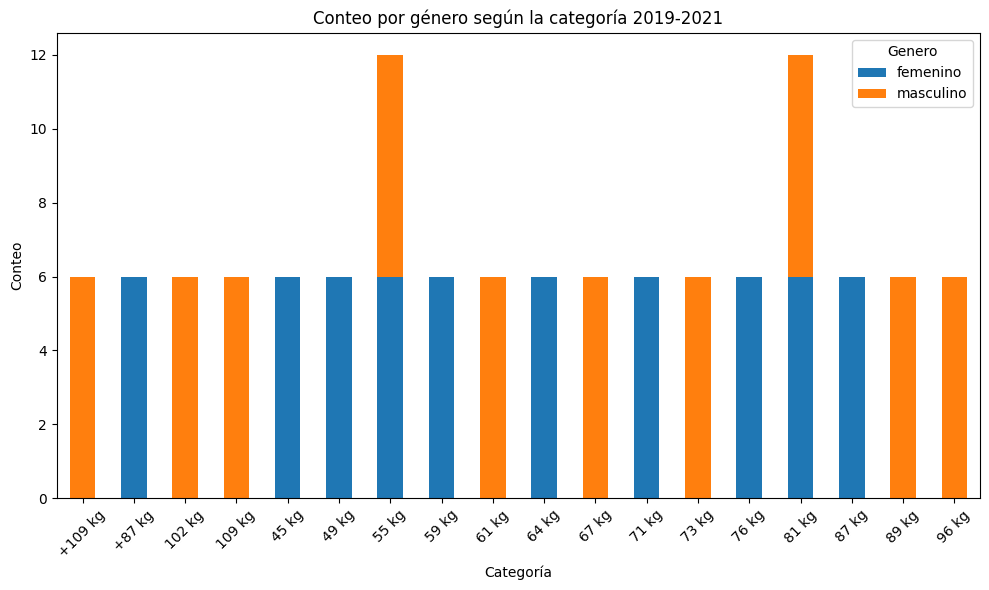

In [660]:
Peso = Peso.groupby(['Categoría', 'Genero'])['conteo'].sum().unstack(fill_value=0)

# Crear la gráfica
Peso.plot(kind='bar', stacked=True, figsize=(10, 6))

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.title('Conteo por género según la categoría 2019-2021')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


* lo pongo por categorias para que sea más visual

In [661]:
distribucion=df1921.copy()


In [662]:
distribucion['Categoría'] = distribucion['Categoría'].astype(str)
distribucion['es_mayor_que'] = distribucion['Categoría'].str.contains(r'\+')
distribucion['Categoría_num'] = distribucion['Categoría'].str.replace(r'\+|\s?kg', '', regex=True)
distribucion['Categoría_num'] = pd.to_numeric(distribucion['Categoría_num'], errors='coerce')
max_val = distribucion['Categoría_num'].max()
distribucion.loc[distribucion['es_mayor_que'], 'Categoría_num'] = max_val + 1
bins = [0, 65, 85, max_val + 1] 
labels = ["peso_bajo", "peso_medio", "peso_alto"]
distribucion['Categoria_Peso'] = pd.cut(distribucion['Categoría_num'], bins=bins, labels=labels)
resultados = distribucion.groupby(["Categoria_Peso", "Genero"])["Categoría_num"].agg(["min", "max", "count"]).reset_index()
def ajustar_max(row):
    if row['Categoria_Peso'] == "peso_alto" and row['max'] > max_val:
        return f"Mayor que {max_val}"
    return row['max']
resultados['max'] = resultados.apply(ajustar_max, axis=1)
print(resultados)


  Categoria_Peso     Genero  min            max  count
0      peso_bajo   femenino   45             64     30
1      peso_bajo  masculino   55             61     12
2     peso_medio   femenino   71             81     18
3     peso_medio  masculino   67             81     18
4      peso_alto   femenino   87  Mayor que 109     12
5      peso_alto  masculino   89  Mayor que 109     30


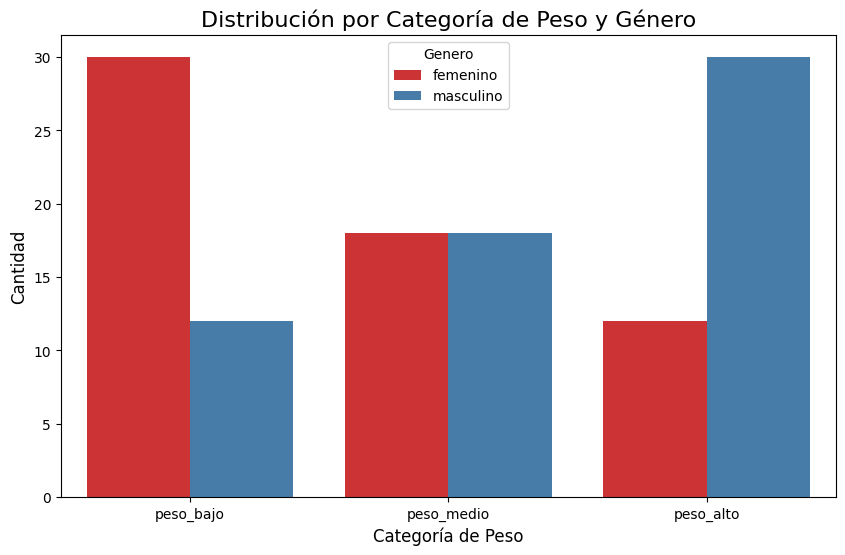

In [663]:
plt.figure(figsize=(10,6))
sns.barplot(x='Categoria_Peso', y='count', hue='Genero', data=resultados, palette='Set1')

# Agregar título y etiquetas
plt.title('Distribución por Categoría de Peso y Género', fontsize=16)
plt.xlabel('Categoría de Peso', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar la gráfica
plt.show()


* ¿Qué atleta ha ganado los dos años consecutivos?

In [664]:
med=df1921


In [665]:
med["Nombre_Atleta"]=df1921["Nombre"]+(" ")+df1921["Apellido"]
medallas_por_atleta = med.groupby(['Nombre_Atleta','Genero']).size().reset_index(name='Total_Medallas')
medallas_por_atleta


,Nombre_Atleta,Genero,Total_Medallas
0,alessia durante,femenino,1
1,alexandra kozlova,femenino,1
2,alina marushchak,femenino,1
3,anastasiya anzorova,femenino,1
4,anastasiya lysenko,femenino,2
...,...,...,...
94,yauheni tsijantsou,masculino,1
95,yegor klimonov,masculino,1
96,yuliya asayonak,femenino,1
97,zoe smith,femenino,1


In [666]:
med["Nombre_Atleta"]=df1921["Nombre"]+(" ")+df1921["Apellido"]
medallas_por_atleta = med.groupby(['Nombre_Atleta']).size().reset_index(name='Cantidad')
total_medallas=medallas_por_atleta.groupby(['Nombre_Atleta'])['Cantidad'].sum().reset_index()
atletas_con_dos_medallas = total[total['Cantidad'] >= 2]
atletas_con_dos_medallas = atletas_con_dos_medallas.sort_values(by='Cantidad', ascending=False)



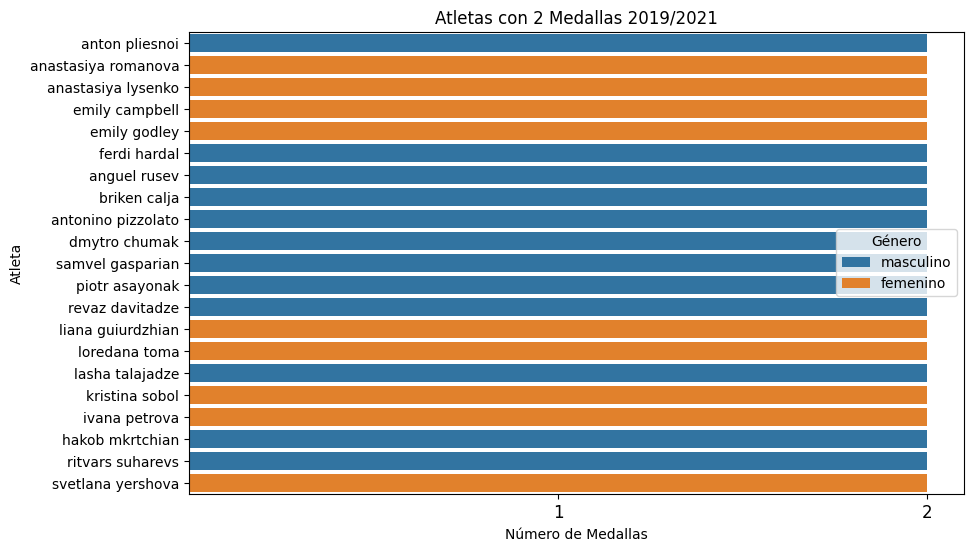

In [667]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad', y='Nombre_Atleta', hue='Genero', data=atletas_con_dos_medallas)
plt.xticks([1, 2])
plt.xticks(fontsize=12)
plt.title("Atletas con 2 Medallas 2019/2021")
plt.xlabel("Número de Medallas")
plt.ylabel("Atleta")
plt.legend(title="Género")
plt.show()


# **Fase 2.** Web scraping

## Paso 1. Importar librerías

In [668]:
from bs4 import BeautifulSoup
!pip install bs4
!pip install requests
import requests


In [669]:
url = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022'


In [670]:
page = requests.get(url)
page


<Response [200]>

## Paso 2. Cargar datos

In [671]:
response = pd.read_html(url)
len(response)


7

In [672]:
dict_datos = {}

for i in range(len(response)):
    print(i)
    dict_datos['fase2_' + str(i)] = response[i]


0
1
2
3
4
5
6


In [673]:
dict_datos.keys()


dict_keys(['fase2_0', 'fase2_1', 'fase2_2', 'fase2_3', 'fase2_4', 'fase2_5', 'fase2_6'])

In [674]:
dict_datos['fase2_0']


,Campeonato Europeo de Halterofilia Tirana 2022,Campeonato Europeo de Halterofilia Tirana 2022.1,Campeonato Europeo de Halterofilia Tirana 2022.2
0,Halterofilia,Halterofilia,Halterofilia
1,Datos generales,Datos generales,Datos generales
2,Sede,Tirana Albania,Tirana Albania
3,Recinto,Tirana Olympic Park,Tirana Olympic Park
4,Categoría,Absoluta,Absoluta
5,Fecha,25 de mayo – 5 de junio de 2022,25 de mayo – 5 de junio de 2022
6,Edición,C,C
7,Organizador,Federación Europea de Halterofilia,Federación Europea de Halterofilia
8,Datos estadísticos,Datos estadísticos,Datos estadísticos
9,Participantes,324,324


In [675]:
#informacion no relevante


In [676]:
dict_datos['fase2_1']



,0,1,2
0,Moscú 2021,Tirana 2022,Ereván 2023


In [677]:
#información no relevante


In [678]:
dict_datos['fase2_2']
#Nos interesa. Masculino 2022.Ya veo que de entrada habrá que renombrar la columna Atleta y hacer un melt.


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446


In [679]:
dict_datos['fase2_3']


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​
1,49 kg (28.05),Giulia Imperio Italia 79 + 92 = 171,Anhelina Lomachynska Ucrania 80 + 87 = 167,María Giménez-Guervos España 72 + 91 = 163
2,55 kg (29.05),Evagjelia Veli Albania 95 + 113 = 208,Kamila Konotop Ucrania 94 + 11 = 207,Nina Sterckx Bélgica 94 + 111 = 205
3,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208
4,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208
5,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215
6,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220
7,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232
8,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235
9,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230


In [680]:
#nos interesa. Son las atletas femeninas


In [681]:
dict_datos['fase2_4'] 
#información no relevante


,Núm.,País,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total
0,1.0,Bulgaria,5,1,2,8
1,2.0,Ucrania,2,4,1,7
2,3.0,Armenia,2,3,2,7
3,3.0,Turquía,2,3,2,7
4,5.0,Italia,2,1,0,3
5,6.0,Francia,2,0,2,4
6,7.0,Georgia,1,3,2,6
7,8.0,Noruega,1,0,1,2
8,9.0,Albania,1,0,0,1
9,9.0,Reino Unido,1,0,0,1


In [682]:
dict_datos['fase2_5'] 
#información no relevante


,0,1,2
0,Predecesor: Moscú 2021 Rusia,Campeonato Europeo de Halterofilia C edición,Sucesor: Ereván 2023 Armenia


In [683]:
dict_datos['fase2_6'] 
dict_datos
#información no relevante


{'fase2_0':    Campeonato Europeo de Halterofilia Tirana 2022  \
 0                                    Halterofilia   
 1                                 Datos generales   
 2                                            Sede   
 3                                         Recinto   
 4                                       Categoría   
 5                                           Fecha   
 6                                         Edición   
 7                                     Organizador   
 8                              Datos estadísticos   
 9                                   Participantes   
 10                                            NaN   
 11                                     Cronología   
 12            Moscú 2021 Tirana 2022  Ereván 2023   
 13                                     Moscú 2021   
 14                     [editar datos en Wikidata]   
 
    Campeonato Europeo de Halterofilia Tirana 2022.1  \
 0                                      Halterofilia   
 1         

In [684]:
#dict_datos['fase2_2'],dict_datos['fase2_3'] 

df=dict_datos.copy()
df1=dict_datos['fase2_2']
df1["Genero"]="Femenino"
df1


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Femenino
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Femenino
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Femenino
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Femenino
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Femenino
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Femenino
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Femenino
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Femenino
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Femenino


In [685]:
df1.shape


(10, 5)

In [686]:
df2=dict_datos['fase2_3']
df2["Genero"]="Masculino"
df2


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero
0,45 kg (28.05),Şaziye Erdoğan Turquía 73 + 90 = 163[n 1]​,Cansu Bektaş Turquía 68 + 85 = 153[n 1]​,Radmila Zagorac Serbia 68 + 84 = 152[n 1]​,Masculino
1,49 kg (28.05),Giulia Imperio Italia 79 + 92 = 171,Anhelina Lomachynska Ucrania 80 + 87 = 167,María Giménez-Guervos España 72 + 91 = 163,Masculino
2,55 kg (29.05),Evagjelia Veli Albania 95 + 113 = 208,Kamila Konotop Ucrania 94 + 11 = 207,Nina Sterckx Bélgica 94 + 111 = 205,Masculino
3,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208,Masculino
4,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208,Masculino
5,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,Masculino
6,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220,Masculino
7,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Masculino
8,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235,Masculino
9,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Masculino


In [687]:
df2.shape
df2022=pd.concat([df1, df2], axis = 0).reset_index(drop=True)
df2022


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Femenino
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Femenino
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Femenino
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Femenino
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Femenino
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Femenino
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Femenino
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Femenino
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Femenino


In [688]:

df2022.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [689]:
df2022.isnull().sum()


Evento        0
Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Genero        0
dtype: int64

In [690]:
df2022=df2022.rename(columns={'Unnamed: 1': 'Oro','Unnamed: 2': 'Plata','Unnamed: 3': 'Bronce','Evento':'Eventos'})



In [691]:
df2022


,Eventos,Oro,Plata,Bronce,Genero
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Femenino
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Femenino
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Femenino
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Femenino
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Femenino
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Femenino
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Femenino
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Femenino
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Femenino


In [692]:
exploracion_inicial(df2022)


	Hay 20 filas y 5 columnas.


,Eventos,Oro,Plata,Bronce,Genero
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Femenino
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Femenino
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Femenino
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Femenino


,Eventos,Oro,Plata,Bronce,Genero
15,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,Masculino
16,76 kg (02.06),Marie Fegue Francia 110 + 135 = 245,Daniela Ivanova Letonia 96 + 126 = 222,Dilara Ucan Turquía 99 + 121 = 220,Masculino
17,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Masculino
18,87 kg (04.06),Solfrid Koanda Noruega 109 + 143 = 252,Anastasiya Manievska Ucrania 107 + 130 = 237,Anastasiya Hotfrid Georgia 106 + 129 = 235,Masculino
19,+87 kg (05.06),Emily Campbell Reino Unido 118 + 153 = 271,Melike Günal Turquía 108 + 134 = 242,Sarah Fischer Austria 102 + 128 = 230,Masculino


,Eventos,Oro,Plata,Bronce,Genero
13,59 kg (30.05),Dora Tchakounté Francia 96 + 117 = 213,Lucrezia Magistris Italia 98 + 114 = 212,Ine Andersson Noruega 90 + 118 = 208,Masculino
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Femenino
17,81 kg (03.06),Iryna Deja Ucrania 116 + 137 = 253,Alina Marushchak Ucrania 108 + 127 = 235,Dilara Narin Turquía 99 + 133 = 232,Masculino
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
14,64 kg (31.05),Mariya Hanhur Ucrania 102 + 120 = 222,Nuray Güngör Turquía 99 + 120 = 219,Vicky Graillot Francia 89 + 119 = 208,Masculino


	 - Eventos
	 - Oro
	 - Plata
	 - Bronce
	 - Genero
Eventos    object
Oro        object
Plata      object
Bronce     object
Genero     object
dtype: object
object    5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Eventos  20 non-null     object
 1   Oro      20 non-null     object
 2   Plata    20 non-null     object
 3   Bronce   20 non-null     object
 4   Genero   20 non-null     object
dtypes: object(5)
memory usage: 932.0+ bytes
None
Eventos    19
Oro        20
Plata      20
Bronce     20
Genero      2
dtype: int64


,Eventos,Oro,Plata,Bronce,Genero
count,20,20,20,20,20
unique,19,20,20,20,2
top,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino
freq,2,1,1,1,10


Eventos    0
Oro        0
Plata      0
Bronce     0
Genero     0
dtype: int64
Eventos    0.0
Oro        0.0
Plata      0.0
Bronce     0.0
Genero     0.0
dtype: float64


In [693]:
df2022["Año"]="2022"
df2022


,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (29.05),Anguel Rusev Bulgaria 113 + 144 = 257[n 1]​,Josué Brachi García España 115 + 141 = 256[n 1]​,Dmytro Voronovsky Ucrania 108 + 134 = 242[n 1]​,Femenino,2022
1,61 kg (29.05),Ivan Dimov Bulgaria 135 + 151 = 286,Simon Brandhuber Alemania 134 + 152 = 286,Gabriel Marinov Bulgaria 122 + 157 = 279,Femenino,2022
2,67 kg (30.05),Valentin Guenchev Bulgaria 139 + 175 = 314,Shota Mishvelidze Georgia 142 + 165 = 307,Acorán Hernández Mendoza España 138 + 161 = 299,Femenino,2022
3,73 kg (31.05),Muhammed Özbek Turquía 149 + 190 = 339,Kaji Asanidze Georgia 150 + 176 = 326,Piotr Kudłaszyk Polonia 143 + 181 = 324,Femenino,2022
4,81 kg (01.06),Rafik Harutiunian Armenia 160 + 194 = 354,Andrés Mata Pérez España 160 + 186 = 346,Bozhidar Andreev Bulgaria 153 + 190 = 343,Femenino,2022
5,89 kg (02.06),Antonino Pizzolato Italia 175 + 217 = 392,Karlos Nasar Bulgaria 171 + 211 = 382,Revaz Davitadze Georgia 171 + 198 = 369,Femenino,2022
6,96 kg (03.06),Davit Hovhannisian Armenia 171 + 206 = 377,Ara Aghanian Armenia 170 + 205 = 375,Romain Imadouchène Francia 160 + 210 = 370,Femenino,2022
7,102 kg (04.06),David Fischerov Bulgaria 177 + 215 = 392,Samvel Gasparian Armenia 176 + 214 = 390,Marcos Ruiz Velasco España 176 + 208 = 384,Femenino,2022
8,109 kg (04.06),Jristo Jristov Bulgaria 180 + 211 = 391,Guiorgui Chjeidze Georgia 174 + 210 = 384,Arsen Martirosian Armenia 170 + 201 = 371,Femenino,2022
9,+109 kg (05.06),Lasha Talajadze Georgia 217 + 245 = 462,Varazdat Lalayan Armenia 211 + 240 = 451,Gor Minasian Armenia 210 + 236 = 446,Femenino,2022


In [694]:
#cargamos 2023. Haré todas las transformaciones de golpe. 


In [695]:
from bs4 import BeautifulSoup
!pip install bs4
!pip install requests
import requests


In [696]:
url = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023'


In [697]:
response = pd.read_html(url)



In [698]:
dict_datos2 = {}

for i in range(len(response)):
    print(i)
    dict_datos2['fase2023_' + str(i)] = response[i]
dict_datos2


0
1
2
3
4
5
6


{'fase2023_0':    Campeonato Europeo de Halterofilia Ereván 2023  \
 0                                    Halterofilia   
 1                       Complejo Karen Demirchian   
 2                                 Datos generales   
 3                                            Sede   
 4                                         Recinto   
 5                                       Categoría   
 6                                           Fecha   
 7                                         Edición   
 8                                     Organizador   
 9                              Datos estadísticos   
 10                                  Participantes   
 11                                            NaN   
 12                                     Cronología   
 13            Tirana 2022 Ereván 2023  Sofía 2024   
 14                                    Tirana 2022   
 15                     [editar datos en Wikidata]   
 
    Campeonato Europeo de Halterofilia Ereván 2023.1  \
 0        

In [699]:
dict_datos2.keys()


dict_keys(['fase2023_0', 'fase2023_1', 'fase2023_2', 'fase2023_3', 'fase2023_4', 'fase2023_5', 'fase2023_6'])

In [700]:
dict_datos2['fase2023_0']


,Campeonato Europeo de Halterofilia Ereván 2023,Campeonato Europeo de Halterofilia Ereván 2023.1,Campeonato Europeo de Halterofilia Ereván 2023.2
0,Halterofilia,Halterofilia,Halterofilia
1,Complejo Karen Demirchian,Complejo Karen Demirchian,Complejo Karen Demirchian
2,Datos generales,Datos generales,Datos generales
3,Sede,Ereván Armenia,Ereván Armenia
4,Recinto,Complejo Karen Demirchyan,Complejo Karen Demirchyan
5,Categoría,Absoluta,Absoluta
6,Fecha,15 – 23 de abril de 2023,15 – 23 de abril de 2023
7,Edición,CI,CI
8,Organizador,Federación Europea de Halterofilia,Federación Europea de Halterofilia
9,Datos estadísticos,Datos estadísticos,Datos estadísticos


In [701]:
dict_datos2['fase2023_1']


,0,1,2
0,Tirana 2022,Ereván 2023,Sofía 2024


In [702]:
dict_datos2['fase2023_2']
# datos atletas masculino


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440


In [703]:
dict_datos2['fase2023_3']
#femenino


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,45 kg (15.04),Cansu Bektaş Turquía 72 + 90 = 162[n 1]​,Adriana Pană Rumania 70 + 83 = 153[n 1]​,Marta García Rincón España 68 + 85 = 153[n 1]​
1,49 kg (15.04),Mihaela Cambei Rumania 92 + 106 = 198,Giulia Imperio Italia 83 + 100 = 183,Anhelina Lomachynska Ucrania 81 + 95 = 176
2,55 kg (16.04),Andreea Cotruță Rumania 91 + 110 = 201,Svitlana Samuliak Ucrania 90 + 109 = 199,Izabella Yailian Armenia 87 + 109 = 196
3,59 kg (17.04),Kamila Konotop Ucrania 106 + 129 = 235,Nina Sterckx Bélgica 93 + 116 = 209,Nadiya Shpylka Ucrania 93 +114 = 207
4,64 kg (18.04),Nuray Güngör Turquía 99 + 120 = 219,Mariya Hanhur Ucrania 98 + 116 = 214,Zoe Smith Reino Unido 93 + 121 = 214
5,71 kg (19.04),Loredana Toma Rumania 110 + 130 = 240,Giulia Miserendino Italia 105 + 125 = 230,Sarah Davies Reino Unido 100 + 126 = 226
6,76 kg (20.04),Marie Fegue Francia 113 + 140 = 253,Tatev Hakobian Armenia 104 + 122 = 226,Daniela Ivanova Letonia 96 + 126 = 222
7,81 kg (21.04),Iryna Deja Ucrania 123 + 135 = 258,Dilara Narin Turquía 101 + 134 = 235,Elena Erighina Moldavia 104 + 130 = 234
8,87 kg (22.04),Solfrid Koanda Noruega 117 + 155 = 272,Anastasiya Manievska Ucrania 108 + 130 = 238,Hripsime Jurshudian Armenia 107 + 120 = 227
9,+87 kg (23.04),Emily Campbell Reino Unido 110 + 143 = 253,Anastasiya Hotfrid Georgia 117+ 135 = 252,Valentyna Kisil Ucrania 111 + 133 = 244


In [704]:
dict_datos2['fase2023_4']


,Núm.,País,Unnamed: 2,Unnamed: 3,Unnamed: 4,Total
0,1.0,Armenia,4,4,5,13
1,2.0,Rumania,3,1,1,5
2,3.0,Georgia,2,4,0,6
3,4.0,Ucrania,2,3,3,8
4,5.0,Turquía,2,2,1,5
5,6.0,Bulgaria,2,0,1,3
6,7.0,Italia,1,3,2,6
7,8.0,Reino Unido,1,0,2,3
8,9.0,Letonia,1,0,1,2
9,10.0,Francia,1,0,0,1


In [705]:
dict_datos2['fase2023_5']


,0,1,2
0,Predecesor: Tirana 2022 Albania,Campeonato Europeo de Halterofilia CI edición,Sucesor: Sofía 2024 Bulgaria


In [706]:
dict_datos2['fase2023_6']


,0,1
0,Control de autoridades,Proyectos Wikimedia Datos: Q113502548 Multim...


In [707]:
dict_datos2['fase2023_0']


,Campeonato Europeo de Halterofilia Ereván 2023,Campeonato Europeo de Halterofilia Ereván 2023.1,Campeonato Europeo de Halterofilia Ereván 2023.2
0,Halterofilia,Halterofilia,Halterofilia
1,Complejo Karen Demirchian,Complejo Karen Demirchian,Complejo Karen Demirchian
2,Datos generales,Datos generales,Datos generales
3,Sede,Ereván Armenia,Ereván Armenia
4,Recinto,Complejo Karen Demirchyan,Complejo Karen Demirchyan
5,Categoría,Absoluta,Absoluta
6,Fecha,15 – 23 de abril de 2023,15 – 23 de abril de 2023
7,Edición,CI,CI
8,Organizador,Federación Europea de Halterofilia,Federación Europea de Halterofilia
9,Datos estadísticos,Datos estadísticos,Datos estadísticos


In [708]:
df_2023df=dict_datos2.copy()


In [709]:
df3=dict_datos2['fase2023_2']
df3["Genero"]="Masculino"


In [710]:
df4=dict_datos2['fase2023_3']
df4["Genero"]="Femenino"


In [711]:
df3


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino


In [712]:
df_2023ok=pd.concat([df3, df4], axis = 0).reset_index(drop=True)


In [713]:
df_2023ok


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Genero
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino


In [714]:
df_2023ok.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [715]:
df_2023ok=df_2023ok.rename(columns={'Unnamed: 1': 'Oro','Unnamed: 2': 'Plata','Unnamed: 3': 'Bronce','Evento':'Eventos'})


In [716]:
url = 'https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023'


In [717]:
response = pd.read_html(url)
len(response)



7

In [718]:
dict_datos3 = {}

for i in range(len(response)):
    print(i)
    dict_datos3['fase2024' + str(i)] = response[i]


0
1
2
3
4
5
6


In [719]:
dict_datos3.keys()


dict_keys(['fase20240', 'fase20241', 'fase20242', 'fase20243', 'fase20244', 'fase20245', 'fase20246'])

In [720]:
df_2024=dict_datos3.copy()
#lo miro todo y lo borro, me quedo solo con las tablas que me interesa para no hacer el notebook kilométrico
df5=df_2024['fase20242']


In [721]:
df6=df_2024['fase20243']


In [722]:
df4=df_2024['fase20242']


In [723]:
df5["Genero"]="Masculino"
df6["Genero"]="Femenino"
df_2024ok=pd.concat([df5, df6], axis = 0).reset_index(drop=True)
df_2024ok.duplicated()
df_2024ok=df_2024ok.rename(columns={'Unnamed: 1': 'Oro','Unnamed: 2': 'Plata','Unnamed: 3': 'Bronce','Evento':'Eventos'})
df_2024ok


,Eventos,Oro,Plata,Bronce,Genero
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino


In [724]:
#vamos a concadenar 2022,23-24.60 columnas
#df2022,df_2023ok,df_2024ok. 2022 ya le puse año.
df_2023ok["Año"]="2023"
df_2024ok["Año"]="2024"


#df_22_23_24=pd.concat([df2022, df_2023ok,df_2023ok], axis = 0).reset_index(drop=True)



In [725]:
df_2023ok
df_2023ok=df_2023ok.rename(columns={'Unnamed: 1': 'Oro','Unnamed: 2': 'Plata','Unnamed: 3': 'Bronce','Evento':'Eventos'})
df_2023ok.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [726]:
df_2024ok=df_2024ok.rename(columns={'Unnamed: 1': 'Oro','Unnamed: 2': 'Plata','Unnamed: 3': 'Bronce','Evento':'Eventos'})

df_2024ok.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [727]:
df_2024ok


,Eventos,Oro,Plata,Bronce,Genero,Año
0,55 kg (16.04),Anguel Rusev Bulgaria 109 + 141 = 250[n 1]​,Ramin Shamilishvili Georgia 113 + 136 = 249[n...,Valentin Iancu Rumania 109 + 136 = 245[n 1]​,Masculino,2024
1,61 kg (16.04),Shota Mishvelidze Georgia 136 + 162 = 298,Sergio Massidda Italia 130 + 162 = 292,Ivan Dimov Bulgaria 127 + 150 = 277,Masculino,2024
2,67 kg (17.04),Gor Sahakian Armenia 145 + 175 = 320,Acorán Hernández Mendoza España 140 + 165 = 305,Kaan Kahriman Turquía 141 + 160 = 301,Masculino,2024
3,73 kg (18.04),Ritvars Suharevs Letonia 152 + 184 = 336,David Sánchez López España 150 + 185 = 335,Mirko Zanni Italia 155 + 180 = 335,Masculino,2024
4,81 kg (19.04),Oscar Reyes Martínez Italia 155 + 188 = 343,Batu Han Yüksel Turquía 152 + 187 = 339,Rafik Harutiunian Armenia 150 + 187 = 337,Masculino,2024
5,89 kg (20.04),Karlos Nasar Bulgaria 174 + 221 = 395,Andranik Karapetian Armenia 178 + 196 = 374,Marin Robu Moldavia 166 + 198 = 364,Masculino,2024
6,96 kg (21.04),Davit Hovhannisian Armenia 172 + 205 = 377,Ara Aghanian Armenia 165 + 199 = 364,Cristiano Ficco Italia 165 + 198 = 363,Masculino,2024
7,102 kg (22.04),Garik Karapetian Armenia 178 + 214 = 392,Irakli Chjeidze Georgia 173 + 214 = 387,Tudor Bratu Moldavia 170 + 204 = 374,Masculino,2024
8,109 kg (22.04),Samvel Gasparian Armenia 175 + 220 = 395,Guiorgui Chjeidze Georgia 173 + 208 = 381,Petros Petrosian Armenia 165 + 214 = 379,Masculino,2024
9,+109 kg (23.04),Lasha Talajadze Georgia 222 + 252 = 474,Varazdat Lalayan Armenia 212 + 250 = 462,Simon Martirosian Armenia 195 + 245 = 440,Masculino,2024


In [728]:
df_19_21_22_23_24=pd.concat([df_2019_2021,df2022, df_2023ok,df_2024ok], axis = 0).reset_index(drop=True)
df_19_21_22_23_24.index



RangeIndex(start=0, stop=100, step=1)

In [729]:
df_fase2_melted = pd.melt(df_19_21_22_23_24, 
                          id_vars=['Eventos', 'Año', 'Genero'], 
                          value_vars=['Oro', 'Plata', 'Bronce'], 
                          var_name='Medalla', 
                          value_name='Atleta')
df_fase2_melted


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino Italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu Bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam Francia 137 + 175 = 312
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev Bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato Italia 155 + 201 = 356
...,...,...,...,...,...
295,71 kg (19.04),2024,Femenino,Bronce,Sarah Davies Reino Unido 100 + 126 = 226
296,76 kg (20.04),2024,Femenino,Bronce,Daniela Ivanova Letonia 96 + 126 = 222
297,81 kg (21.04),2024,Femenino,Bronce,Elena Erighina Moldavia 104 + 130 = 234
298,87 kg (22.04),2024,Femenino,Bronce,Hripsime Jurshudian Armenia 107 + 120 = 227


In [730]:
df_fase2_melted = df_fase2_melted.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_fase2_melted


,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356
...,...,...,...,...,...
295,71 kg (19.04),2024,femenino,bronce,sarah davies reino unido 100 + 126 = 226
296,76 kg (20.04),2024,femenino,bronce,daniela ivanova letonia 96 + 126 = 222
297,81 kg (21.04),2024,femenino,bronce,elena erighina moldavia 104 + 130 = 234
298,87 kg (22.04),2024,femenino,bronce,hripsime jurshudian armenia 107 + 120 = 227


In [731]:
df_fase2_melted.rename(columns={'Año': 'Fecha'}, inplace=True)


In [732]:
filtro2=df_fase2_melted[df_fase2_melted['Atleta'].apply(tiene_cuatro_palabras)]


In [733]:
filtro2


,Eventos,Fecha,Genero,Medalla,Atleta
35,71 kg (07.04),2021,femenino,oro,emily godley reino unido 98 + 129 = 227
39,+87 kg (11.04),2021,femenino,oro,emily campbell reino unido 122 + 154 = 276
59,+87 kg (05.06),2022,masculino,oro,emily campbell reino unido 118 + 153 = 271
64,81 kg (19.04),2023,masculino,oro,oscar reyes martínez italia 155 + 188 = 343
79,+87 kg (23.04),2023,femenino,oro,emily campbell reino unido 110 + 143 = 253
84,81 kg (19.04),2024,masculino,oro,oscar reyes martínez italia 155 + 188 = 343
99,+87 kg (23.04),2024,femenino,oro,emily campbell reino unido 110 + 143 = 253
115,71 kg (10.04),2019,femenino,plata,emily godley reino unido 93 + 123 = 216
117,81 kg[n 2]​ (12.04),2019,femenino,plata,anna van bellinghen bélgica 103 + 118 = 221
134,64 kg (06.04),2021,femenino,plata,sarah davies reino unido 101 + 129 = 230


In [734]:
df_fase2_melted['Nombre'] = df_fase2_melted['Atleta'].apply(lambda x: separar_nombre(x)[0])
df_fase2_melted['Apellido'] = df_fase2_melted['Atleta'].apply(lambda x: separar_nombre(x)[1])


In [735]:
df_fase2_melted.Nombre.unique()



array(['mirco', 'henadz', 'bernardin', 'bozhidar', 'antonino', 'hakob',
       'yauheni', 'dmytro', 'simon', 'lasha', 'şaziye', 'elena', 'joanna',
       'rebeka', 'loredana', 'anastasiya', 'daria', 'nina', 'xeniya',
       'tatiana', 'anguel', 'stilian', 'muhammed', 'daniyar', 'karen',
       'anton', 'samvel', 'nadezhda', 'monica', 'kamila', 'boyanka',
       'emily', 'iryna', 'alina', 'ivan', 'valentin', 'rafik', 'davit',
       'david', 'jristo', 'giulia', 'evagjelia', 'dora', 'mariya',
       'patricia', 'marie', 'solfrid', 'shota', 'gor', 'ritvars', 'oscar',
       'karlos', 'garik', 'cansu', 'mihaela', 'andreea', 'nuray',
       'bünyamin', 'briken', 'piotr', 'revaz', 'yegor', 'andrei', 'li',
       'ivana', 'kristina', 'svetlana', 'irina', 'lidia', 'anna', 'diana',
       'mirko', 'marin', 'arsen', 'olga', 'sarah', 'alessia', 'yana',
       'gaëlle', 'josué', 'kaji', 'andrés', 'ara', 'guiorgui', 'varazdat',
       'anhelina', 'lucrezia', 'lisa', 'daniela', 'melike', 'ramin',
  

In [736]:
df_fase2_melted['Apellido'].unique()


array(['scarantino', 'laptseu', 'matam', 'andreev', 'pizzolato',
       'mkrtchian', 'tsijantsou', 'chumak', 'martirosian', 'talajadze',
       'erdoğan', 'andrieș', 'łochowska', 'koha', 'toma', 'romanova',
       'naumava', 'schroth', 'pasjina', 'kashirina', 'rusev', 'grozdev',
       'özbek', 'i̇smayilov', 'avaguian', 'pliesnoi', 'gasparian',
       'nguen', 'csengeri', 'konotop', 'kostova', 'godley', 'deja',
       'marushchak', 'ajmerova', 'campbell', 'dimov', 'guenchev',
       'harutiunian', 'hovhannisian', 'fischerov', 'jristov', 'imperio',
       'veli', 'tchakounté', 'hanhur', 'strenius', 'fegue', 'koanda',
       'mishvelidze', 'sahakian', 'suharevs', 'reyes martínez', 'nasar',
       'karapetian', 'bektaş', 'cambei', 'cotruță', 'güngör', 'sezer',
       'brandhuber', 'calja', 'asayonak', 'davitadze', 'klimonov',
       'aramnau', 'turmanidze', 'petrova', 'sobol', 'yershova', 'aleyeva',
       'lepșa', 'valentín', 'van bellinghen', 'mstiyeva', 'lysenko',
       'iancu', 'zann

In [737]:
df_fase2_melted[['Arrancada', 'Dos Tiempos', 'Total']] = df_fase2_melted['Atleta'].apply(extraer_resultados)
df_fase2_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,71 kg (19.04),2024,femenino,bronce,sarah davies reino unido 100 + 126 = 226,sarah,davies,100,126,226
296,76 kg (20.04),2024,femenino,bronce,daniela ivanova letonia 96 + 126 = 222,daniela,ivanova,96,126,222
297,81 kg (21.04),2024,femenino,bronce,elena erighina moldavia 104 + 130 = 234,elena,erighina,104,130,234
298,87 kg (22.04),2024,femenino,bronce,hripsime jurshudian armenia 107 + 120 = 227,hripsime,jurshudian,107,120,227


** En los años 2022 y 2023 quedan descartados los países Rusia y Bielorusia por la invasión Rusia en Ucrania

In [738]:
df_fase2_melted['País'] = df_fase2_melted['Atleta'].apply(extraer_pais)
df_fase2_melted


,Eventos,Fecha,Genero,Medalla,Atleta,Nombre,Apellido,Arrancada,Dos Tiempos,Total,País
0,55 kg (06.04),2019,masculino,oro,mirco scarantino italia 116 + 145 = 261[n 1]​,mirco,scarantino,116,145,261,italia
1,61 kg (07.04),2019,masculino,oro,henadz laptseu bielorrusia 133 + 153 = 286,henadz,laptseu,133,153,286,bielorrusia
2,67 kg (08.04),2019,masculino,oro,bernardin matam francia 137 + 175 = 312,bernardin,matam,137,175,312,francia
3,73 kg (09.04),2019,masculino,oro,bozhidar andreev bulgaria 153 + 192 = 345,bozhidar,andreev,153,192,345,bulgaria
4,81 kg (10.04),2019,masculino,oro,antonino pizzolato italia 155 + 201 = 356,antonino,pizzolato,155,201,356,italia
...,...,...,...,...,...,...,...,...,...,...,...
295,71 kg (19.04),2024,femenino,bronce,sarah davies reino unido 100 + 126 = 226,sarah,davies,100,126,226,reino unido
296,76 kg (20.04),2024,femenino,bronce,daniela ivanova letonia 96 + 126 = 222,daniela,ivanova,96,126,222,letonia
297,81 kg (21.04),2024,femenino,bronce,elena erighina moldavia 104 + 130 = 234,elena,erighina,104,130,234,moldavia
298,87 kg (22.04),2024,femenino,bronce,hripsime jurshudian armenia 107 + 120 = 227,hripsime,jurshudian,107,120,227,armenia


In [739]:
df_fase2_melted.País.unique()


array(['italia', 'bielorrusia', 'francia', 'bulgaria', 'armenia',
       'ucrania', 'georgia', 'turquía', 'rumania', 'polonia', 'letonia',
       'rusia', 'alemania', 'azerbaiyán', 'reino unido', 'albania',
       'suecia', 'noruega', 'españa', 'bélgica', 'moldavia', 'austria',
       'serbia'], dtype=object)

In [740]:
df_total=df_fase2_melted[['Fecha', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']].copy()
df_total


,Fecha,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,2019,mirco,scarantino,italia,116,145,261
1,2019,henadz,laptseu,bielorrusia,133,153,286
2,2019,bernardin,matam,francia,137,175,312
3,2019,bozhidar,andreev,bulgaria,153,192,345
4,2019,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...
295,2024,sarah,davies,reino unido,100,126,226
296,2024,daniela,ivanova,letonia,96,126,222
297,2024,elena,erighina,moldavia,104,130,234
298,2024,hripsime,jurshudian,armenia,107,120,227


In [741]:
df_fase2_melted['Categoría'] = df_fase2_melted['Eventos'].str.extract(r'(\+?\d+\s?kg)')
df_fase1_melted
df_fase2_melted['Categoría'] = df_fase2_melted['Categoría'].str.replace('\u00a0', ' ', regex=False)
df=df_fase2_melted[['Genero', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos Tiempos', 'Total']]
df.dtypes


Genero         object
Categoría      object
Fecha          object
Medalla        object
Nombre         object
Apellido       object
País           object
Arrancada       int64
Dos Tiempos     int64
Total           int64
dtype: object

In [742]:
df.dtypes


Genero         object
Categoría      object
Fecha          object
Medalla        object
Nombre         object
Apellido       object
País           object
Arrancada       int64
Dos Tiempos     int64
Total           int64
dtype: object

In [743]:
df['Categoría'] = df['Categoría'].astype('category')
df['Medalla'] = df['Medalla'].astype('category')
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y')
df['Fecha'] = df['Fecha'].dt.year 
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## Paso 3. Exploración inicial

In [744]:
exploracion_inicial(df)



	Hay 300 filas y 10 columnas.


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
295,femenino,71 kg,2024,bronce,sarah,davies,reino unido,100,126,226
296,femenino,76 kg,2024,bronce,daniela,ivanova,letonia,96,126,222
297,femenino,81 kg,2024,bronce,elena,erighina,moldavia,104,130,234
298,femenino,87 kg,2024,bronce,hripsime,jurshudian,armenia,107,120,227
299,femenino,+87 kg,2024,bronce,valentyna,kisil,ucrania,111,133,244


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
273,femenino,59 kg,2023,bronce,nadiya,shpylka,ucrania,93,114,207
280,masculino,55 kg,2024,bronce,valentin,iancu,rumania,109,136,245
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
152,masculino,55 kg,2022,plata,kamila,konotop,ucrania,94,11,207
237,femenino,81 kg,2021,bronce,liana,guiurdzhian,armenia,98,129,227


	 - Genero
	 - Categoría
	 - Fecha
	 - Medalla
	 - Nombre
	 - Apellido
	 - País
	 - Arrancada
	 - Dos Tiempos
	 - Total
Genero           object
Categoría      category
Fecha             int64
Medalla        category
Nombre           object
Apellido         object
País             object
Arrancada         int64
Dos Tiempos       int64
Total             int64
dtype: object
object      4
int64       4
category    1
category    1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Genero       300 non-null    object  
 1   Categoría    300 non-null    category
 2   Fecha        300 non-null    int64   
 3   Medalla      300 non-null    category
 4   Nombre       300 non-null    object  
 5   Apellido     300 non-null    object  
 6   País         300 non-null    object  
 7   Arrancada    300 non-null    int64   
 8   Dos 

,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
count,300,300,300.0,300,300,300,300,300.0,300.0,300.0
unique,2,18,,3,132,150,23,,,
top,masculino,81 kg,,bronce,anastasiya,chjeidze,armenia,,,
freq,150,30,,100,11,6,47,,,
mean,,,2021.8,,,,,128.57,155.636667,284.546667
std,,,1.72334,,,,,37.760623,44.990352,81.800319
min,,,2019.0,,,,,67.0,11.0,150.0
25%,,,2021.0,,,,,99.0,121.0,222.0
50%,,,2022.0,,,,,114.5,141.0,253.0
75%,,,2023.0,,,,,162.25,196.0,363.0


Genero         0
Categoría      0
Fecha          0
Medalla        0
Nombre         0
Apellido       0
País           0
Arrancada      0
Dos Tiempos    0
Total          0
dtype: int64
Genero         0.0
Categoría      0.0
Fecha          0.0
Medalla        0.0
Nombre         0.0
Apellido       0.0
País           0.0
Arrancada      0.0
Dos Tiempos    0.0
Total          0.0
dtype: float64


In [745]:
# ya vemos que anastasiya es el atleta más top en bronce. Veo que hay muchas categorías. Veremos como se distribuye todo.
df.describe().round(1)


,Fecha,Arrancada,Dos Tiempos,Total
count,300.0,300.0,300.0,300.0
mean,2021.8,128.6,155.6,284.5
std,1.7,37.8,45.0,81.8
min,2019.0,67.0,11.0,150.0
25%,2021.0,99.0,121.0,222.0
50%,2022.0,114.5,141.0,253.0
75%,2023.0,162.2,196.0,363.0
max,2024.0,222.0,263.0,485.0


In [746]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Genero       300 non-null    object  
 1   Categoría    300 non-null    category
 2   Fecha        300 non-null    int64   
 3   Medalla      300 non-null    category
 4   Nombre       300 non-null    object  
 5   Apellido     300 non-null    object  
 6   País         300 non-null    object  
 7   Arrancada    300 non-null    int64   
 8   Dos Tiempos  300 non-null    int64   
 9   Total        300 non-null    int64   
dtypes: category(2), int64(4), object(4)
memory usage: 20.3+ KB


In [747]:
df.describe(include="category")


,Categoría,Medalla
count,300,300
unique,18,3
top,81 kg,bronce
freq,30,100


In [748]:
df.País.value_counts()



País
armenia        47
ucrania        31
georgia        27
turquía        26
bulgaria       24
italia         21
rusia          20
rumania        19
reino unido    13
españa         12
francia         9
bielorrusia     9
letonia         8
moldavia        8
bélgica         5
alemania        4
noruega         4
albania         3
polonia         3
azerbaiyán      2
suecia          2
austria         2
serbia          1
Name: count, dtype: int64

In [749]:
df.Nombre.value_counts()


Nombre
anastasiya    11
emily          7
lasha          5
nina           5
giulia         5
              ..
vicky          1
marcos         1
radmila        1
romain         1
maría          1
Name: count, Length: 132, dtype: int64

## Paso 4. Crear un único dataframe con los datos de 2019, 2020, 2021, 2022, 2023 y 2024

In [750]:
df


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,femenino,71 kg,2024,bronce,sarah,davies,reino unido,100,126,226
296,femenino,76 kg,2024,bronce,daniela,ivanova,letonia,96,126,222
297,femenino,81 kg,2024,bronce,elena,erighina,moldavia,104,130,234
298,femenino,87 kg,2024,bronce,hripsime,jurshudian,armenia,107,120,227


## Paso 5. Transformar los datos

Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)

Formato inicial:

| Eventos | Oro | Plata | Bronce | Año | Género |
|---------|-----|-------|--------|-----|--------|

**¡Importante!**
El dataframe final debe tener este formato:

| Eventos | Año | Genero | Medalla | Atleta |
|---------|-----|-------|--------|-----|

In [751]:
#he hecho las transformaciones anteriormente


## Paso 6. Creación de columnas


- Fecha
- Nombre
- Apellido
- País
- Resultados
- Arrancada
- Dos tiempos
- Total

## Paso 7. Filtrado de columnas y ordenación

**¡Importante!**
El dataframe final debe contener exclusivamente las siguientes columnas:

| Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
|-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [752]:
df


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,femenino,71 kg,2024,bronce,sarah,davies,reino unido,100,126,226
296,femenino,76 kg,2024,bronce,daniela,ivanova,letonia,96,126,222
297,femenino,81 kg,2024,bronce,elena,erighina,moldavia,104,130,234
298,femenino,87 kg,2024,bronce,hripsime,jurshudian,armenia,107,120,227


In [753]:
df.Genero.value_counts()


Genero
masculino    150
femenino     150
Name: count, dtype: int64

## Paso 8. Tipo de datos

**¡Importante!**
Los tipos de las columnas deben ser los siguientes:

- **Género**: `object`
- **Categoría**: `category`
- **Fecha**: `datetime64[ns]`
- **Medalla**: `category`
- **Nombre**: `object`
- **Apellido**: `object`
- **País**: `object`
- **Arrancada**: `int64`
- **Dos tiempos**: `int64`
- **Total**: `int64`

In [754]:
df.dtypes


Genero           object
Categoría      category
Fecha             int64
Medalla        category
Nombre           object
Apellido         object
País             object
Arrancada         int64
Dos Tiempos       int64
Total             int64
dtype: object

In [755]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y', errors='coerce').dt.year
df


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,femenino,71 kg,2024,bronce,sarah,davies,reino unido,100,126,226
296,femenino,76 kg,2024,bronce,daniela,ivanova,letonia,96,126,222
297,femenino,81 kg,2024,bronce,elena,erighina,moldavia,104,130,234
298,femenino,87 kg,2024,bronce,hripsime,jurshudian,armenia,107,120,227


## Paso 9. Ordendar
**¡Importante!**
El conjunto de datos debe estar ordenado por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']. La siguiente imagen es un ejemplo:

| Genero   | Categoria | Fecha      | Medalla | Nombre    | Apellido | País      | Arrancada | Dos tiempos | Total |
|----------|-----------|------------|---------|-----------|----------|-----------|-----------|-------------|-------|
| Femenino | 45        | 2020-04-03 | Oro     | Nadezhda  | Nguen    | Bulgaria  | 72        | 83          | 155   |
| Femenino | 45        | 2020-04-03 | Plata   | Ivana     | Petrova  | Bulgaria  | 67        | 85          | 152   |
| Femenino | 45        | 2020-04-03 | Bronce  | Melisa    | Güneş    | Turquía   | 68        | 83          | 151   |
| Femenino | 49        | 2020-04-03 | Oro     | Monica    | Csengeri | Rumania   | 86        | 103         | 189   |
| Femenino | 49        | 2020-04-03 | Plata   | Kristina  | Sobol    | Rusia     | 85        | 96          | 181   |


In [756]:
df.sort_values(by=['Genero', 'Categoría', 'Fecha', 'Medalla'],ascending=True, ignore_index = True)
df


,Genero,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos Tiempos,Total
0,masculino,55 kg,2019,oro,mirco,scarantino,italia,116,145,261
1,masculino,61 kg,2019,oro,henadz,laptseu,bielorrusia,133,153,286
2,masculino,67 kg,2019,oro,bernardin,matam,francia,137,175,312
3,masculino,73 kg,2019,oro,bozhidar,andreev,bulgaria,153,192,345
4,masculino,81 kg,2019,oro,antonino,pizzolato,italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
295,femenino,71 kg,2024,bronce,sarah,davies,reino unido,100,126,226
296,femenino,76 kg,2024,bronce,daniela,ivanova,letonia,96,126,222
297,femenino,81 kg,2024,bronce,elena,erighina,moldavia,104,130,234
298,femenino,87 kg,2024,bronce,hripsime,jurshudian,armenia,107,120,227


## Paso 10. EDA
Realiza un análisis exploratorio de los datos que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas

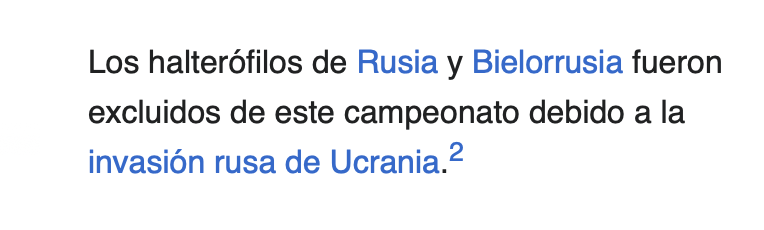

* los paises Rusia y Bielorrusia quedan excluidos en el periodo 2022-2023

** me pregunto si ha cambiado la distribución de los pesos vs genero en los siguientes años

**¿Qué atletas se ven afectados?

In [757]:
df
atletas_rusia_bielorrusia = df[df['País'].isin(['rusia', 'bielorrusia'])]
atletas_rusia_bielorrusia = atletas_rusia_bielorrusia[['Nombre', 'Apellido']]
atletas_rusia_bielorrusia
atletas_rusia_bielorrusia['Nombre_Atleta'] = (atletas_rusia_bielorrusia['Nombre'] + ' ' + atletas_rusia_bielorrusia['Apellido']).str.lower()


In [758]:
#atletas_con_dos_medallas quiero ver si son de estos 2 paises y si tendrá afectación o no
atletas_con_dos_medallas


,Nombre_Atleta,Genero,Cantidad
10,anton pliesnoi,masculino,2
5,anastasiya romanova,femenino,2
4,anastasiya lysenko,femenino,2
30,emily campbell,femenino,2
31,emily godley,femenino,2
32,ferdi hardal,masculino,2
8,anguel rusev,masculino,2
16,briken calja,masculino,2
11,antonino pizzolato,masculino,2
25,dmytro chumak,masculino,2


In [759]:
atletas_en_comun = atletas_con_dos_medallas[atletas_con_dos_medallas['Nombre_Atleta'].isin(atletas_rusia_bielorrusia['Nombre_Atleta'])]
atletas_en_comun


,Nombre_Atleta,Genero,Cantidad
5,anastasiya romanova,femenino,2
69,piotr asayonak,masculino,2
48,kristina sobol,femenino,2
83,svetlana yershova,femenino,2


In [760]:
Pesox = df.groupby(['Categoría', 'Genero']).size().reset_index(name="conteo")

Pesox


,Categoría,Genero,conteo
0,+109 kg,femenino,3
1,+109 kg,masculino,12
2,+87 kg,femenino,12
3,+87 kg,masculino,3
4,102 kg,femenino,3
5,102 kg,masculino,12
6,109 kg,femenino,3
7,109 kg,masculino,12
8,45 kg,femenino,12
9,45 kg,masculino,3


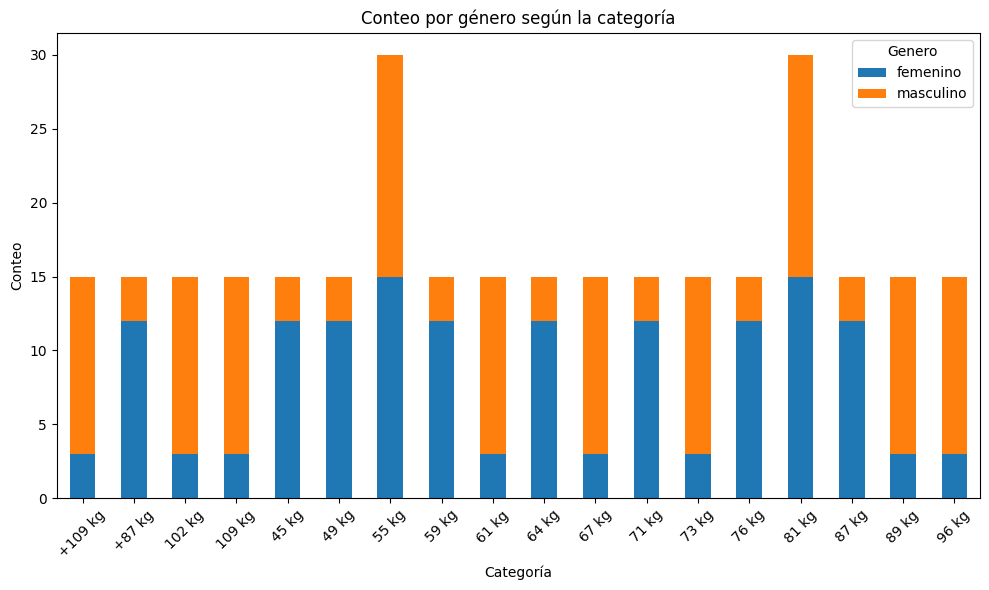

In [761]:
Pesox = Pesox.groupby(['Categoría', 'Genero'])['conteo'].sum().unstack(fill_value=0)

# Crear la gráfica
Pesox.plot(kind='bar', stacked=True, figsize=(10, 6))

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.title('Conteo por género según la categoría')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


** me pregunto qué atletas han gando más medallas?

In [762]:
meda=df.copy()


In [763]:
meda=df.copy()
meda["Nombre_Atleta"]=df["Nombre"]+(" ")+df["Apellido"]
medallas_por_atletaa = meda.groupby(['Nombre_Atleta']).size().reset_index(name='Cantidad')
total_medallasa=medallas_por_atletaa.groupby(['Nombre_Atleta'])['Cantidad'].sum().reset_index()
total_medallasa
atletas_con_tres_o_mas_medallas = total_medallasa[total_medallasa['Cantidad'] >= 3]
atletas_con_tres_o_mas_medallas


,Nombre_Atleta,Cantidad
0,acorán hernández mendoza,3
6,anastasiya hotfrid,3
8,anastasiya manievska,3
10,andranik karapetian,3
14,anguel rusev,5
15,anhelina lomachynska,3
18,antonino pizzolato,3
19,ara aghanian,3
27,cansu bektaş,3
30,daniela ivanova,3


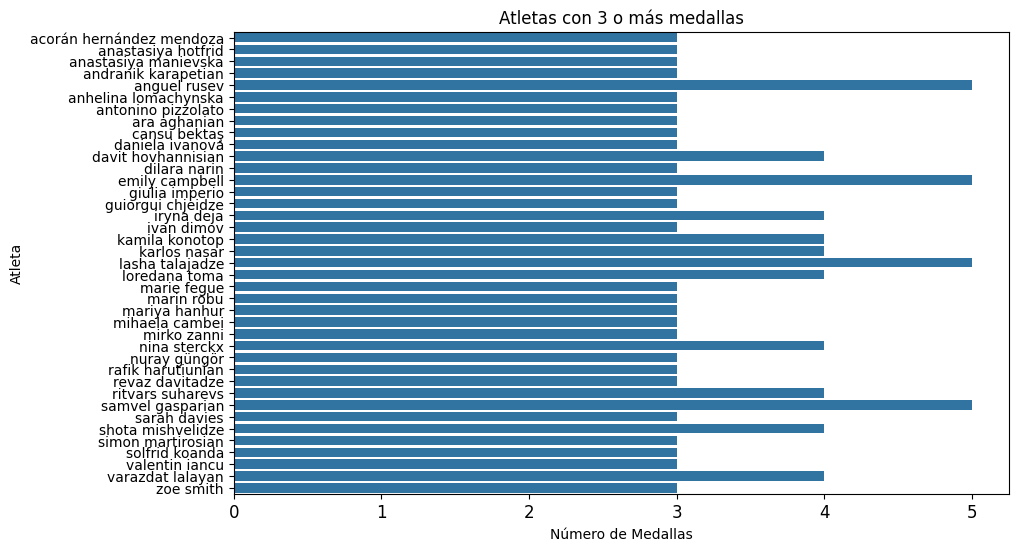

In [764]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad', y='Nombre_Atleta', data=atletas_con_tres_o_mas_medallas)
plt.xticks(fontsize=12)
plt.title("Atletas con 3 o más medallas")
plt.xlabel("Número de Medallas")
plt.ylabel("Atleta")
plt.show()


** vamos a ver si existen los atletas de rusia y bielorusia que incialmente habían ganado 2 medallas

In [765]:
atletas_en_comun2 = atletas_con_tres_o_mas_medallas[atletas_con_tres_o_mas_medallas['Nombre_Atleta'].isin(atletas_rusia_bielorrusia['Nombre_Atleta'])]
atletas_en_comun2


,Nombre_Atleta,Cantidad


** Qué atletas han ganado todos los años?

In [766]:
ganadores_todos_años = atletas_con_tres_o_mas_medallas[atletas_con_tres_o_mas_medallas['Cantidad'] == 5]
ganadores_todos_años


,Nombre_Atleta,Cantidad
14,anguel rusev,5
47,emily campbell,5
80,lasha talajadze,5
125,samvel gasparian,5


## **Preguntas obligatorias a resolver**

### ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [767]:
medallas_por_pais2 = df.groupby(['País', 'Medalla']).size().unstack(fill_value=0)


In [768]:
import plotly.express as px

def graficar_proporciones(medallas_por_pais2, variable_categorica_1, variable_categorica_2):
    
    colores_personalizados = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#f5a623', '#f0e68c', 
        '#00bfae', '#ff6347', '#3b3a36', '#9c27b0', '#cd5c5c', '#ff1493',  
        '#32cd32', '#ff4500'  
    ]
    

    
    fig = px.histogram(medallas_por_pais2, 
                       x=medallas_por_pais2.index,  
                       y=medallas_por_pais2.columns,  
                       title='Medallas conseguidas por país en los años 2019-2021-2022-2023-2024',
                       labels={variable_categorica_1: 'Medalla',
                               variable_categorica_2: 'País'},
                       text_auto=True,
                       barmode='stack',
                       color_discrete_sequence=colores_personalizados)

    fig.update_layout(yaxis_title='Cantidad de Medallas',
                      legend_title=variable_categorica_2,
                      bargap=0.2)

    fig.update_layout({
        'plot_bgcolor': 'rgba(255, 255, 255, 1)',
        'xaxis': {'showgrid': True, 'gridcolor': 'lightgrey'},
        'yaxis': {'showgrid': True, 'gridcolor': 'lightgrey'}
    })

    fig.show()


variable_categorica_1 = "Medalla"
variable_categorica_2 = "País"


graficar_proporciones(medallas_por_pais2, variable_categorica_1, variable_categorica_2)



### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [769]:
medallas_por_paisx = df.groupby('País')['Medalla'].count()
medallas_por_paisx = pd.crosstab(df['País'], df['Medalla'])
medallas_por_paisx



Medalla,bronce,oro,plata
País,,,
albania,1,1,1
alemania,0,1,3
armenia,19,14,14
austria,2,0,0
azerbaiyán,1,1,0
bielorrusia,3,3,3
bulgaria,5,13,6
bélgica,2,0,3
españa,5,0,7


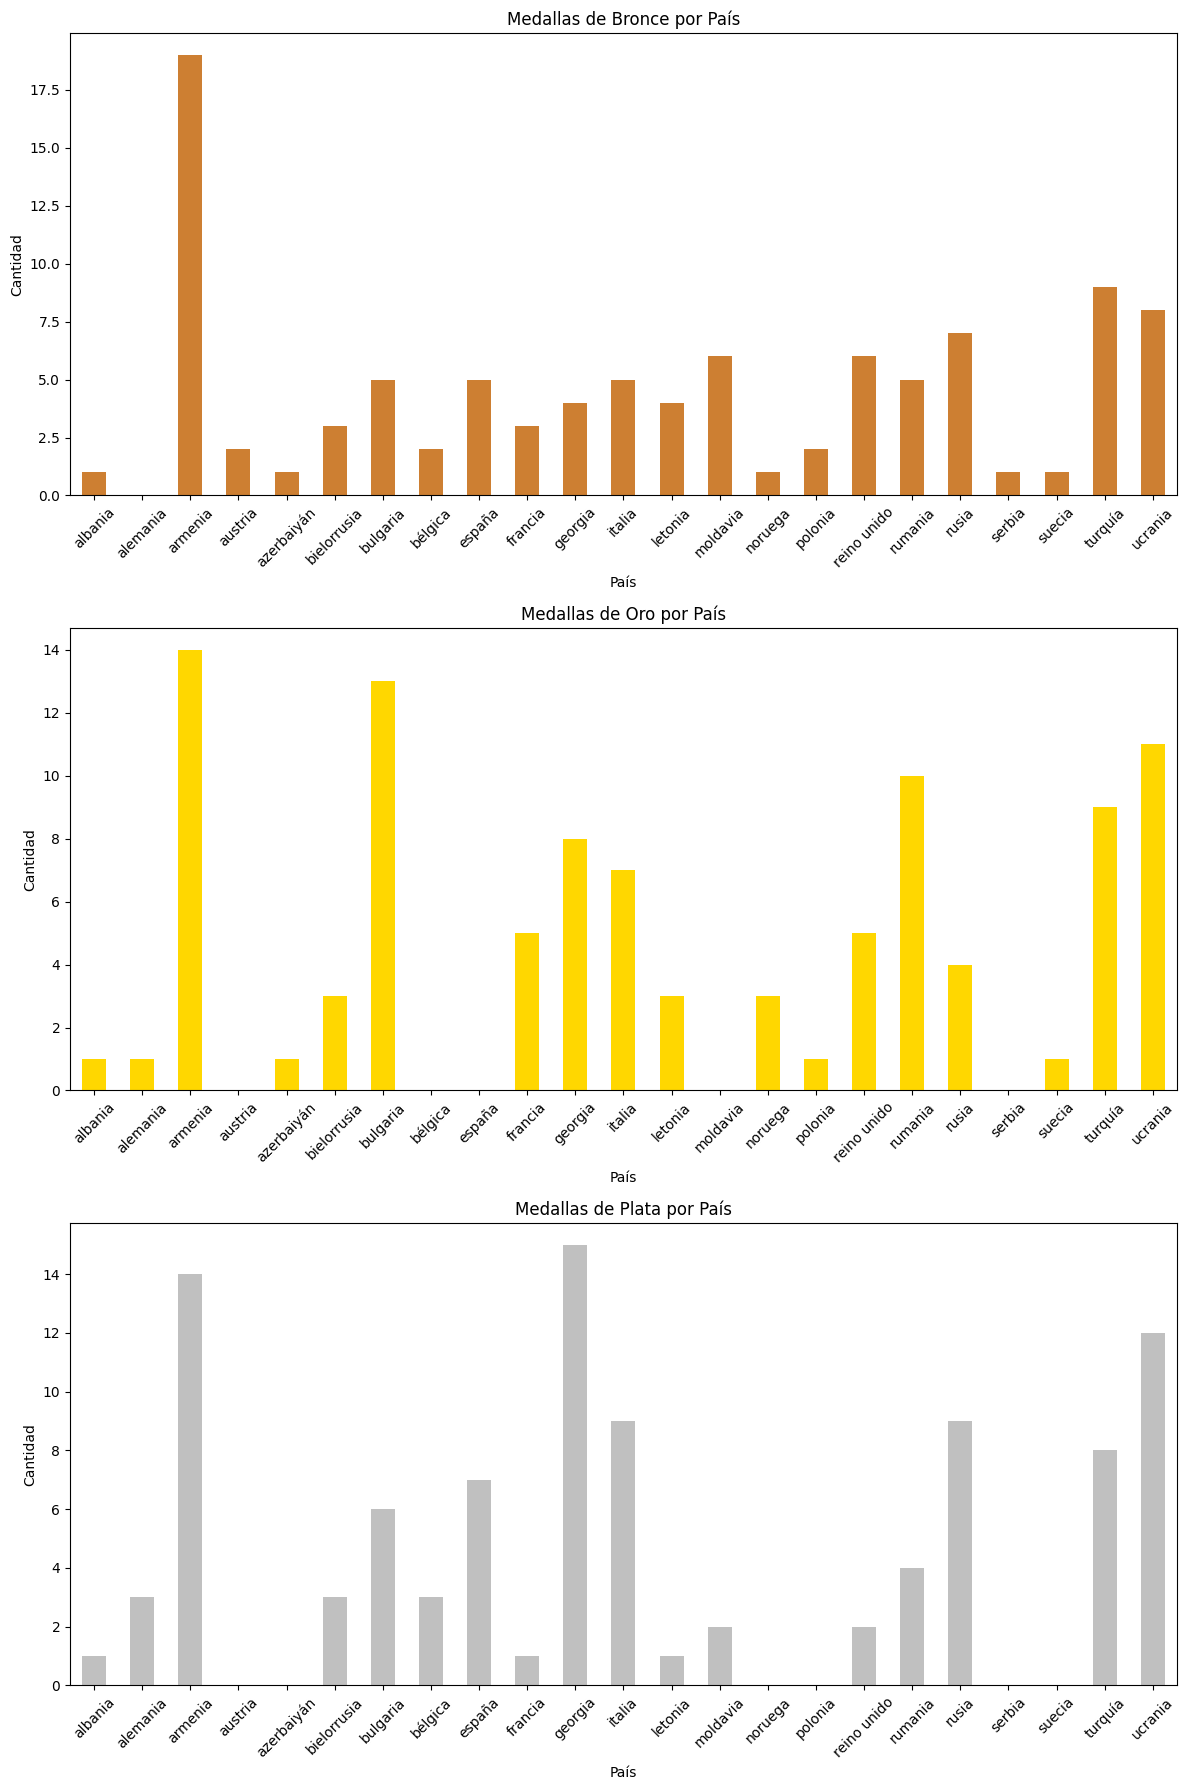

In [770]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))  

colors = ['#cd7f32', '#ffd700', '#c0c0c0']

medallas_por_paisx['bronce'].plot(kind='bar', ax=ax[0], color=colors[0])
ax[0].set_title('Medallas de Bronce por País')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Cantidad')
ax[0].set_xticklabels(medallas_por_paisx.index, rotation=45)

medallas_por_paisx['oro'].plot(kind='bar', ax=ax[1], color=colors[1])
ax[1].set_title('Medallas de Oro por País')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Cantidad')
ax[1].set_xticklabels(medallas_por_paisx.index, rotation=45)

medallas_por_paisx['plata'].plot(kind='bar', ax=ax[2], color=colors[2])
ax[2].set_title('Medallas de Plata por País')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Cantidad')
ax[2].set_xticklabels(medallas_por_paisx.index, rotation=45)

plt.tight_layout()

plt.show()




### ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [771]:
equidad2 = df.groupby(['País', 'Genero','Medalla']).size().reset_index(name='Total_Medallas')
equidad2


,País,Genero,Medalla,Total_Medallas
0,albania,femenino,bronce,0
1,albania,femenino,oro,0
2,albania,femenino,plata,0
3,albania,masculino,bronce,1
4,albania,masculino,oro,1
...,...,...,...,...
133,ucrania,femenino,oro,7
134,ucrania,femenino,plata,8
135,ucrania,masculino,bronce,1
136,ucrania,masculino,oro,4


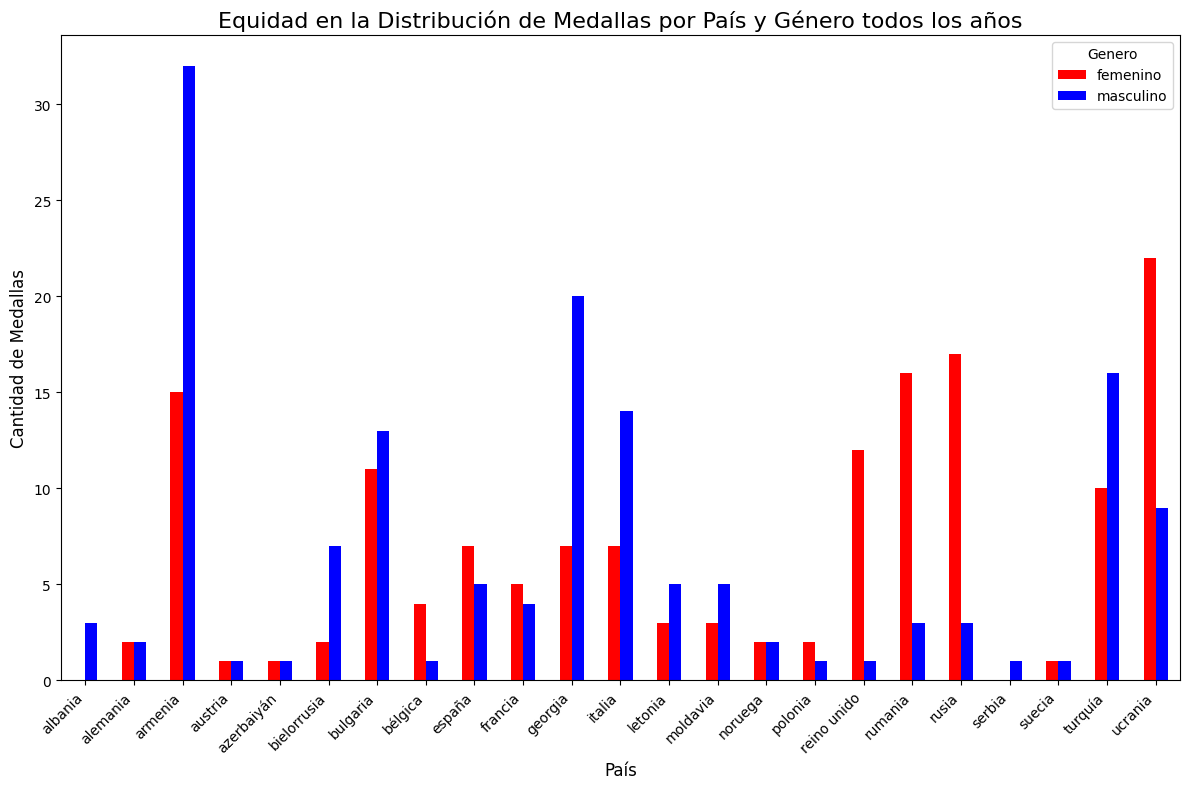

In [772]:
equidad2 = df.groupby(['País', 'Genero']).size().reset_index(name='Total_Medallas')
equidad2.pivot(index='País', columns='Genero', values='Total_Medallas').plot(kind='bar', figsize=(12, 8), color=['red', 'blue'])

plt.title('Equidad en la Distribución de Medallas por País y Género todos los años', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de Medallas', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [773]:
promedio_puntos_totales2 = df.groupby(["País","Genero"])['Total'].mean().round(1).reset_index()




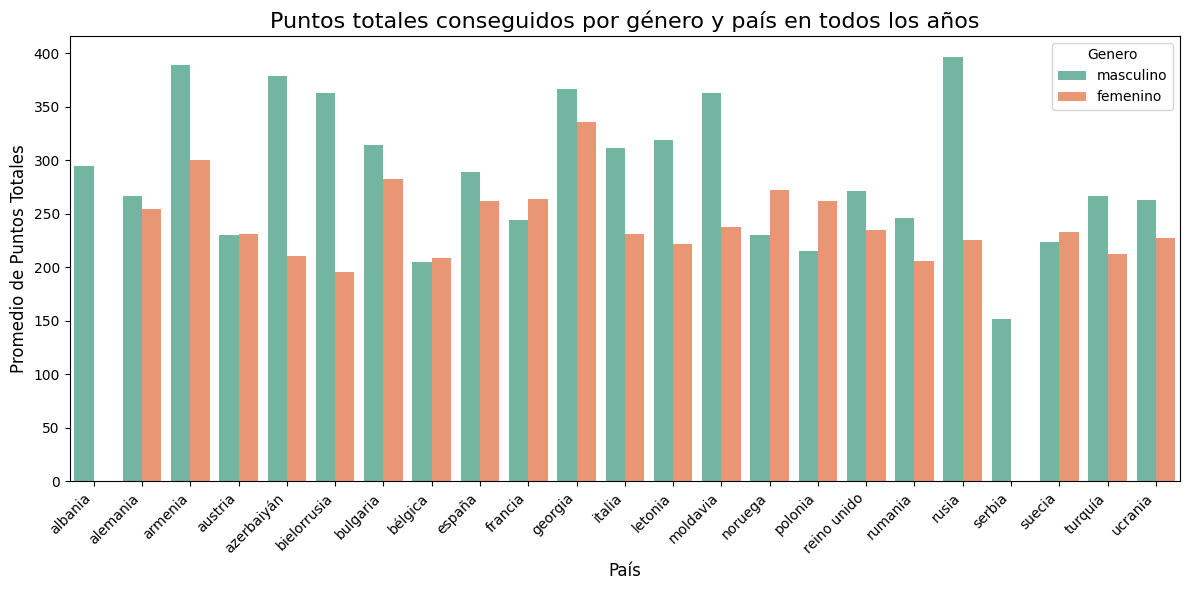

In [774]:
plt.figure(figsize=(12, 6))
sns.barplot(data=promedio_puntos_totales2, x='País', y='Total', hue='Genero', palette='Set2')
plt.title('Puntos totales conseguidos por género y país en todos los años', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio de Puntos Totales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [775]:
groupedk = promedio_puntos_totales2.groupby(['País', 'Genero'], as_index=False)['Total'].sum()
grouped_by_paisk = groupedk.groupby('País')['Genero'].apply(set)
grouped_by_paisk
paises_con_ambos_generosk = grouped_by_paisk[grouped_by_pais2.apply(lambda x: len(x) == 2)].index
paises_con_ambos_generosk
df_filtradok = groupedk[groupedk['País'].isin(paises_con_ambos_generosk)]
total_por_paisk = df_filtradok.groupby('País')['Total'].sum().reset_index(name='Total_País')
total_por_paisk
df_final_k = pd.merge(df_filtradok, total_por_paisk, on='País')
df_final_k
df_final_k['Porcentaje'] = (df_final_k['Total'] / df_final_k['Total_País']) * 100
df_final_k.round(2)


,País,Genero,Total,Total_País,Porcentaje
0,alemania,femenino,254.0,521.0,48.75
1,alemania,masculino,267.0,521.0,51.25
2,armenia,femenino,300.4,689.3,43.58
3,armenia,masculino,388.9,689.3,56.42
4,austria,femenino,231.0,461.0,50.11
5,austria,masculino,230.0,461.0,49.89
6,azerbaiyán,femenino,211.0,590.0,35.76
7,azerbaiyán,masculino,379.0,590.0,64.24
8,bielorrusia,femenino,196.0,558.4,35.10
9,bielorrusia,masculino,362.4,558.4,64.90


In [776]:
fig = px.bar(df_final_k.round(2), x='País', y='Porcentaje', color='Genero',
             title='Porcentaje de Masculino y Femenino por País',
             labels={'Pais': 'País', 'Porcentaje': 'Porcentaje (%)', 'Genero': 'Género'},
             text='Porcentaje', barmode='group')
fig.show()


In [777]:
df_masculinok = df_final_k[df_final_k['Genero'] == 'Masculino']
df_femeninok = df_final_k[df_final_k['Genero'] == 'Femenino']
df_final_k['Genero'] = df_final_k['Genero'].str.strip().str.capitalize()
df_femeninok = df_final_k[df_final_k['Genero'] == 'Femenino']
df_masculinok = df_final_k[df_final_k['Genero'] == 'Masculino']
df_combinadok = pd.merge(df_masculinok[['País', 'Porcentaje']], df_femeninok[['País', 'Porcentaje']], on='País', suffixes=('_Masculino', '_Femenino'))
df_combinadok


,País,Porcentaje_Masculino,Porcentaje_Femenino
0,alemania,51.247601,48.752399
1,armenia,56.419556,43.580444
2,austria,49.891540,50.108460
3,azerbaiyán,64.237288,35.762712
4,bielorrusia,64.899713,35.100287
5,bulgaria,52.671244,47.328756
6,bélgica,49.516908,50.483092
7,españa,52.444121,47.555879
8,francia,48.139398,51.860602
9,georgia,52.191235,47.808765


In [778]:
df_combinadok['Diferencia_Porcentual'] = df_combinadok['Porcentaje_Masculino'] - df_combinadok['Porcentaje_Femenino']
df_combinadok.round(2)


,País,Porcentaje_Masculino,Porcentaje_Femenino,Diferencia_Porcentual
0,alemania,51.25,48.75,2.50
1,armenia,56.42,43.58,12.84
2,austria,49.89,50.11,-0.22
3,azerbaiyán,64.24,35.76,28.47
4,bielorrusia,64.90,35.10,29.80
5,bulgaria,52.67,47.33,5.34
6,bélgica,49.52,50.48,-0.97
7,españa,52.44,47.56,4.89
8,francia,48.14,51.86,-3.72
9,georgia,52.19,47.81,4.38


In [779]:
df_combinadok['Diferencia_Porcentual'] = df_combinadok['Diferencia_Porcentual'].abs()


In [780]:
fig = px.bar(df_combinadok, x='País', y='Diferencia_Porcentual',
             title='Diferencia Porcentual de puntos totales entre Masculino y Femenino por País todos los años',
             labels={'Diferencia_Porcentual': 'Diferencia Porcentual (%)', 'País': 'País'},
             color='Diferencia_Porcentual', color_continuous_scale='Viridis')

# Mostrar el gráfico
fig.show()
